![meme](https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/images/fml_09_meme_02.jpg)

# Úvod

Spokojenost zákazníků v leteckém průmyslu je jedním z klíčových faktorů, které ovlivňují loajalitu cestujících a úspěch společnosti. Tento projekt se zaměřuje na analýzu datasetu obsahujícího výsledky průzkumu spokojenosti cestujících. Hlavním cílem je prostřednictvím shlukovací analýzy identifikovat skupiny cestujících s podobnými charakteristikami a odhalit, které faktory mají nejsilnější vliv na jejich spokojenost či nespokojenost.

[Odkaz na dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data)

[Soubor s zadáním](README.md)

Často se stává, že některé obrázky a grafy při exportu při lokálním zobrazení skrze editor nejsou zobrazeny správně. Pokud by se Vám něco takového stalo, doporučuji otevřít tento notebook z [odkazu na Githubu](https://github.com/SLI0124/strojove-uceni/blob/master/projects/data_clustering.ipynb), nebo pomocí [NBVieweru](https://nbviewer.org/github/SLI0124/strojove-uceni/blob/master/projects/data_clustering.ipynb).

# Načtení knihoven

In [65]:
import time
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, dbscan
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy as sch
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import NearestNeighbors

sys.setrecursionlimit(100_000)  # for single linkage

# Explorační analýza dat (Exploratory Data Analysis - EDA)

In [2]:
df = pd.concat([pd.read_csv("../datasets/projects/train.csv"),
                pd.read_csv("../datasets/projects/test.csv")], ignore_index=True)
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

## Popis dat

In [3]:
print(f"Počet řádků: {df.shape[0]}\nPočet atributů: {df.shape[1]}")

Počet řádků: 129880
Počet atributů: 25


In [4]:
df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  129880.000000  129880.000000  129880.000000    129880.000000   
mean    44158.700000   64940.500000      39.427957      1190.316392   
std     31207.377062   37493.270818      15.119360       997.452477   
min         0.000000       1.000000       7.000000        31.000000   
25%     16234.750000   32470.750000      27.000000       414.000000   
50%     38963.500000   64940.500000      40.000000       844.000000   
75%     71433.250000   97410.250000      51.000000      1744.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          129880.000000                      129880.000000   
mean                2.728696                           3.057599   
std                 1.329340                           1.526741   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           129880.000000  129880.000000   129880.000000    129880.000000   
mean                 2.756876       2.976925        3.204774         3.252633   
std                  1.401740       1.278520        1.329933         1.350719   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  129880.000000           129880.000000     129880.000000   
mean        3.441361                3.358077          3.383023   
std         1.319289                1.334049          1.287099   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     129880.000000     129880.000000    129880.000000     129880.000000   
mean           3.350878          3.632114         3.306267          3.642193   
std            1.316252          1.180025         1.266185          1.176669   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  129880.000000               129880.000000             129487.000000  
mean        3.286326                   14.713713                 15.091129  
std         1.313682                   38.071126                 38.465650  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

In [5]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

### Datový slovník

| Atribut                               | Popis                                                                               | Datový typ |
|:--------------------------------------|:------------------------------------------------------------------------------------|:-----------|
| **Unnamed: 0**                        | Nepojmenovaný sloupec (Index)                                                       | `int64`    |
| **id**                                | ID cestujících                                                                      | `int64`    |
| **Gender**                            | Gender cestujících (Žena, Muž)                                                      | `object`   |
| **Customer Type**                     | Typ zákazníka (Lojální zákazník, Neloajální zákazník)                               | `object`   |
| **Age**                               | Skutečný věk cestujících                                                            | `int64`    |
| **Type of Travel**                    | Účel letu cestujících (Osobní cestování, Obchodní cestování)                        | `object`   |
| **Class**                             | Třída cestování v letadle (Business, Eco, Eco Plus)                                 | `object`   |
| **Flight Distance**                   | Vzdálenost letu této cesty                                                          | `int64`    |
| **Inflight wifi service**             | Úroveň spokojenosti s wifi službami na palubě (0: Neaplikovatelné; 1-5)             | `int64`    |
| **Departure/Arrival time convenient** | Úroveň spokojenosti s pohodlností času odletu/příletu                               | `int64`    |
| **Ease of Online booking**            | Úroveň spokojenosti s online rezervací                                              | `int64`    |
| **Gate location**                     | Úroveň spokojenosti s umístěním brány                                               | `int64`    |
| **Food and drink**                    | Úroveň spokojenosti s jídlem a nápoji                                               | `int64`    |
| **Online boarding**                   | Úroveň spokojenosti s online odbavením                                              | `int64`    |
| **Seat comfort**                      | Úroveň spokojenosti s pohodlím sedadla                                              | `int64`    |
| **Inflight entertainment**            | Úroveň spokojenosti s palubní zábavou                                               | `int64`    |
| **On-board service**                  | Úroveň spokojenosti s obsluhou na palubě                                            | `int64`    |
| **Leg room service**                  | Úroveň spokojenosti s prostorem pro nohy                                            | `int64`    |
| **Baggage handling**                  | Úroveň spokojenosti s manipulací s bagáží                                           | `int64`    |
| **Checkin service**                   | Úroveň spokojenosti s odbavovacími službami                                         | `int64`    |
| **Inflight service**                  | Úroveň spokojenosti s palubními službami                                            | `int64`    |
| **Cleanliness**                       | Úroveň spokojenosti s čistotou                                                      | `int64`    |
| **Departure Delay in Minutes**        | Počet minut zpoždění při odletu                                                     | `int64`    |
| **Arrival Delay in Minutes**          | Počet minut zpoždění při příletu                                                    | `float64`  |
| **Satisfaction**                      | Úroveň spokojenosti s leteckou společností (Spokojenost, Neutralita, Nespokojenost) | `object`   |


### Kontrola duplicitních hodnot

In [6]:
int(df.duplicated().sum())

0

Paráda, v datasetu nejsou žádné duplicitní hodnoty.

### Kontrola chybějících hodnot

In [7]:
columns_with_missing = df.columns[df.isnull().any()]
print(df[columns_with_missing].isnull().sum().apply(
    lambda x: f"{x} / {len(df)} ({(x / len(df) * 100):.2f}%)"))

Arrival Delay in Minutes    393 / 129880 (0.30%)
dtype: object


Máme jen jeden atribut s chybějícími hodnotami. Jedná se o atribut `Arrival Delay in Minutes`. Tento atribut obsahuje *393* hodnot, což představuje *0.30%* z celkového počtu řádků.

Chybějící hodnoty můžeme buď:
- nahradit průměrnou hodnotou
- odstranit chybějící hodnoty

Jelikož se jedná o malý počet chybějících hodnot, můžeme si dovolit odstranit tyto hodnoty.

### Zahození nepotřebných sloupců

In [8]:
df_encoded = df.copy()

In [9]:
df_encoded.dropna(subset=["Arrival Delay in Minutes"], inplace=True)

Bylo by dobré zahodit sloupce `Unnamed: 0` a `id`, protože neobsahují žádné užitečné informace.

In [10]:
df_encoded.drop(columns=["Unnamed: 0", "id"], inplace=True)

### 🚀 Shrnutí
- Celkem zde máme 129 880 záznamů a 25 atributů, takže se jedná o poměrně velký dataset 📈
    - obsahuje 5 ne-numerických ✏️
    - a 20 numerických atributů 🔢
- vyloučíme `Unnamed` a `id` z datasetu, protože nepřidávají jakoukoliv váhu k datasetu 🗑️
- Dataset neobsahuje žádné duplicitní hodnoty ✅
- rozhodli jsme se zahodit  **39** záznamů z `Arrival Delay in Minutes`, což je asi *0,3%* ⏳📉

## Kódoání kategorických atributů

Kódování kategorických atributů je důležité pro shlukovací analýzu, jelikož algoritmy potřebují numerické hodnoty. V našem datasetu máme několik kategorických atributů, se kterými se budeme muset poprat.

In [11]:
categorical_columns = df_encoded.select_dtypes(include=["object"]).columns
print("\n".join(categorical_columns))

Gender
Customer Type
Type of Travel
Class
satisfaction


#### Unikátní hodnoty kategorických atributů

In [12]:
for column in categorical_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


V následujících krocích si rozdělíme kategorické atributy do jednotlivých skupin a specifikujeme, jak je budeme kódovat.

### Hierarchie hodnot kategorických atributů

Hierchické hodnoty nám mohou pomoct během shlukoání, jelikož nám mohou poskytnout informace o vztazích mezi jednotlivými hodnotami.

Jistou hierchii lze vidět u atributu `Class`. Třída `Economy Plus` je lepší než `Economy`, ale horší než `Business`.

Spekulovat by se dalo i nad `Satisfaction`, kde `neutral or dissatisfied` je horší než `satisfied`, ale tím, že se jedná o cílový atribut, který navíc hodnoty `neutral` a `dissatisfied` spojuje do jedné kategorie, tak toto je spíše spekulativní. Proto jsem se rozhodl tento atribut nezahrnovat jako hierarchický.

In [13]:
class_mapping = {
    "Eco": 1,
    "Eco Plus": 2,
    "Business": 3
}

In [14]:
df_encoded["Class"] = df_encoded["Class"].map(class_mapping)

In [15]:
df_encoded["Class"].sort_values().unique().tolist()

[1, 2, 3]

#### Label encoding

`Label encoding` je jednoduchá technika kódování kategorických atributů, kde každá hodnota je nahrazena číslem. Tato technika je vhodná pro kategorické atributy, u kterých neexistuje žádná hierarchie, a proto nám jejich pořadí nepomůže a můžeme je kódovat pomocí `label encoding`.

In [16]:
binary_columns = df_encoded.select_dtypes(include=["object"]).columns
for column in binary_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
satisfaction: ['neutral or dissatisfied' 'satisfied']


Jak jde vidět, všechny atributy můžeme kódovat pomocí `label encoding`, jelikož neobsahují žádnou hierarchii.

Můžeme použít funkci `LabelEncoder` z knihovny `sklearn`, ale pro kontrolu a následnou vizualizaci je lepší si vytvořit vlastní mapování.

In [17]:
gender_mapping = {
    "Male": 0,
    "Female": 1
}

customer_type_mapping = {
    "Loyal Customer": 0,
    "disloyal Customer": 1
}

travel_mapping = {
    "Personal Travel": 0,
    "Business travel": 1
}

satisfaction_mapping = {
    "neutral or dissatisfied": 0,
    "satisfied": 1
}

categorical_dict_mapping = {
    "Gender": gender_mapping,
    "Customer Type": customer_type_mapping,
    "Type of Travel": travel_mapping,
    "satisfaction": satisfaction_mapping
}

In [18]:
for column in binary_columns:
    df_encoded[column] = df_encoded[column].map(categorical_dict_mapping[column])

#### Kontrola zakódování kategorických atributů

In [19]:
for column in categorical_columns:
    print(f"{column}: {df_encoded[column].unique()}")

Gender: [0 1]
Customer Type: [0 1]
Type of Travel: [0 1]
Class: [2 3 1]
satisfaction: [0 1]


Skvělé, všechny kategorické atributy jsou nyní transformovány do numerické podoby.

### 🔑 Poznámky
- `Class` jsme se rozhodli přeměnit na hierhické vztahy 🔄
- `Gender`, `Customer Type`, `Type of Travel` a `satisfaction` jsme se rozhodli proměnit náhodně pomocí `Label encoding` 🎲

## Visualizace dat

In [20]:
numerical_categorical_columns = ["Arrival Delay in Minutes", "Departure Delay in Minutes", "Age", "Flight Distance"]
binary_categorical_columns = ["satisfaction", "Type of Travel", "Customer Type", "Gender", "Class"]
category_categorical_columns = ["Cleanliness", "Inflight service", "Checkin service", "Baggage handling",
                                "Leg room service", "On-board service", "Inflight entertainment", "Seat comfort",
                                "Online boarding", "Food and drink", "Gate location", "Ease of Online booking",
                                "Departure/Arrival time convenient", "Inflight wifi service"]

### Numerické atributy

In [21]:
def plot_numerical_attributes(dataframe):
    for index in numerical_categorical_columns:
        plt.figure(figsize=(16, 6))

        # Histogram
        plt.subplot(1, 3, 1)
        dataframe[index].plot(kind='hist')
        plt.title(f'{index}')

        # Distribution Plot with Fitted Normal Distribution
        plt.subplot(1, 3, 2)
        sns.histplot(dataframe[index], kde=True)
        plt.title(f'Rozdělení atributu {index}')

        # Box Plot
        plt.subplot(1, 3, 3)
        dataframe[index].plot(kind='box')
        plt.title(f'{index}')

        plt.tight_layout()
        plt.show()

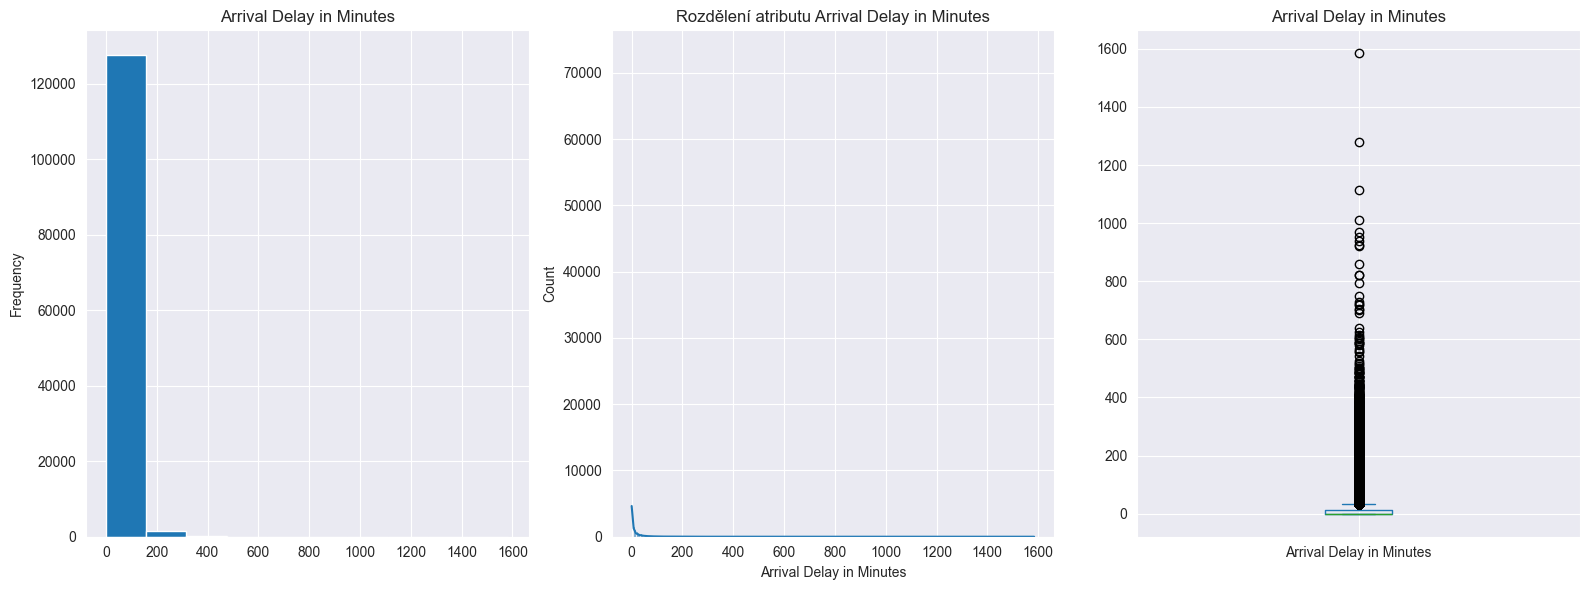

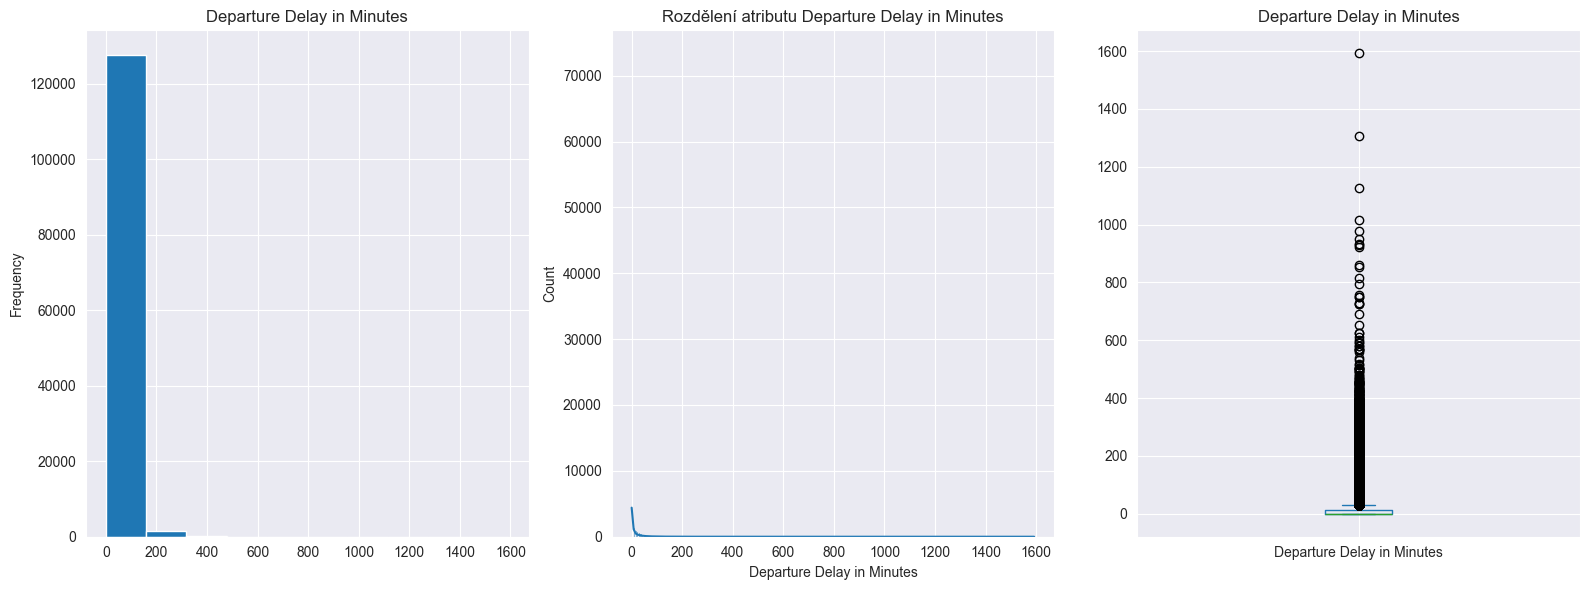

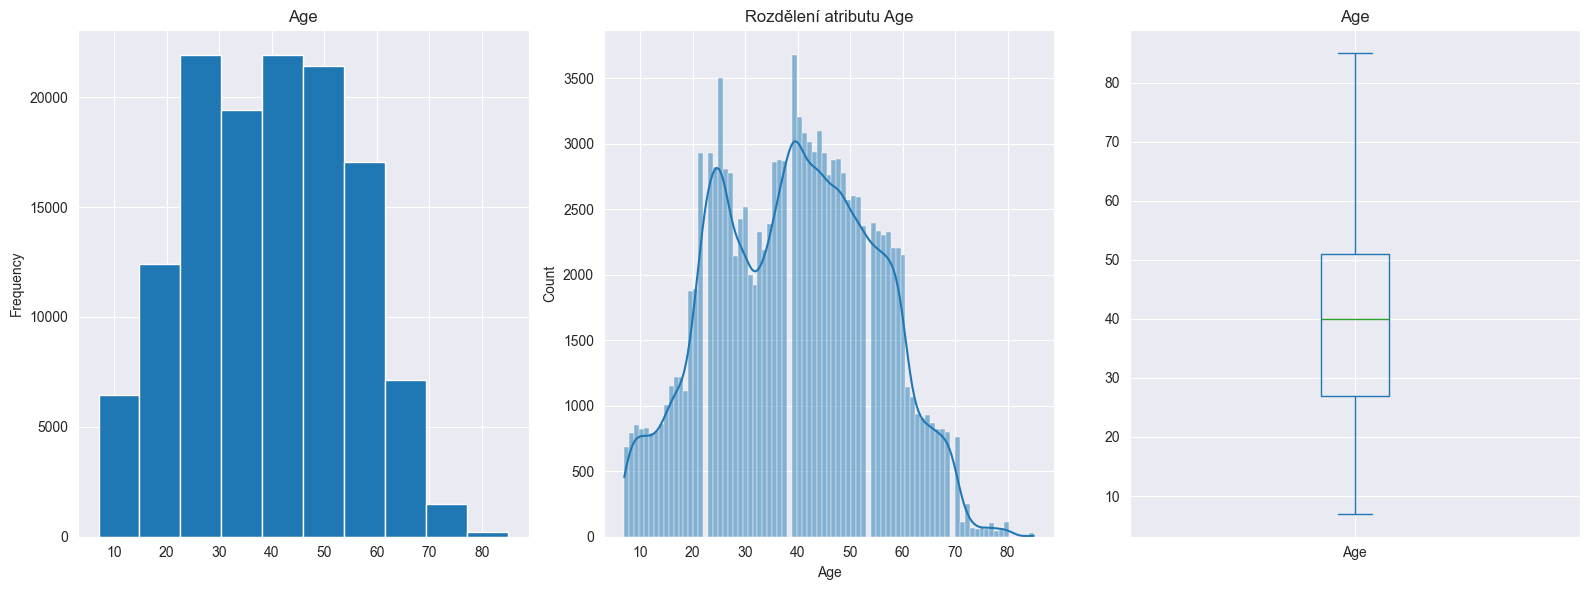

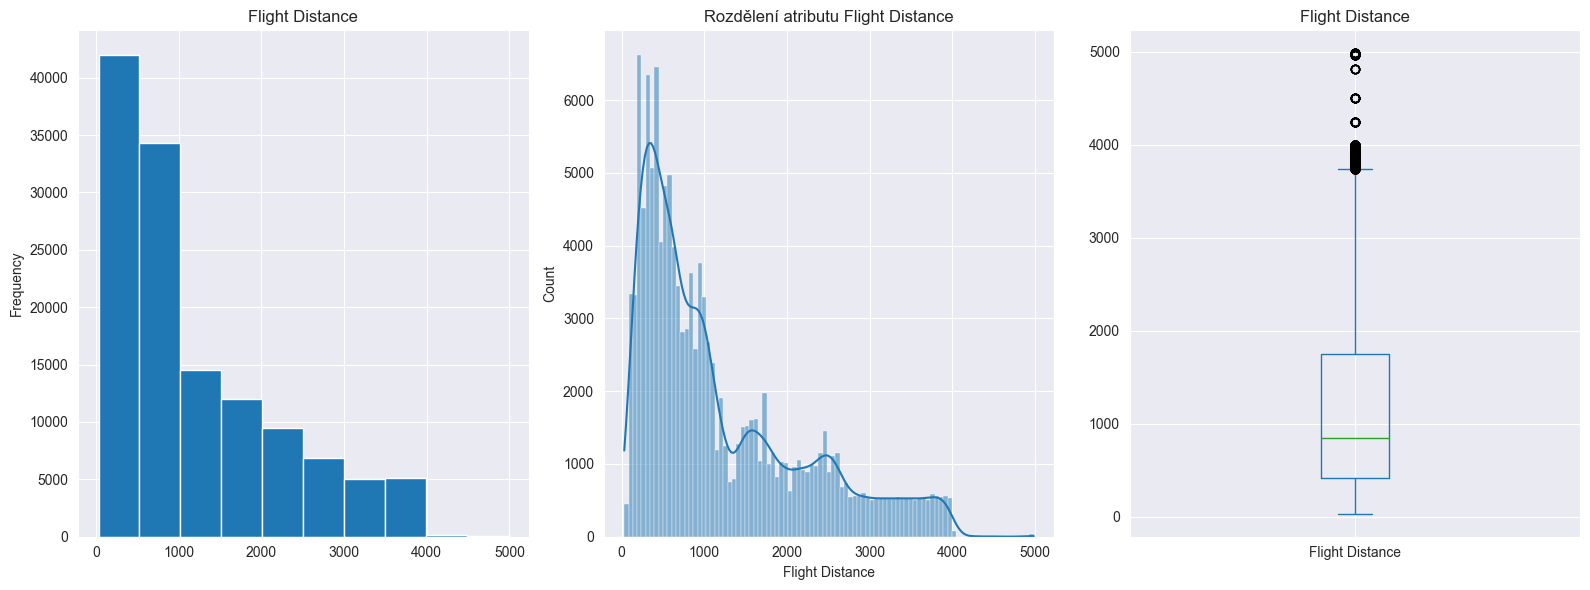

In [22]:
plot_numerical_attributes(df_encoded)

Kromě atributu `Age` všechny atributy obsahují odlehlé hodnoty. Tyto hodnoty mohou být způsobeny chybnými daty nebo mohou být skutečné hodnoty, které by mohly být důležité pro analýzu. Bylo by dobré se na ně podívat a zjistit, zda se jedná o chyby nebo skutečné hodnoty. Vidíme, že u atributů `Arrival Delay in Minutes` a `Departure Delay in Minutes` máme sposty odlehlých hodnot.

#### Odlehlé hodnoty

In [23]:
numerical_outlier_total_count = 0

for i in numerical_categorical_columns:
    if i == "Age":  # from plots, we can see that Age has no outliers
        continue  # hence we will skip this attribute

    df_no_missing = df_encoded.dropna(subset=[i])  # for now, we will drop missing values

    lof = LocalOutlierFactor()
    column_data = df_no_missing[[i]].values.reshape(-1, 1)
    outliers = lof.fit_predict(column_data)
    outlier_list = (outliers == -1).tolist()
    num_outliers = sum(outlier_list)
    numerical_outlier_total_count += num_outliers
    print(f"Počet odelehlých hodnot v {i}: {num_outliers} / "
          f"{len(df_no_missing)} ({(num_outliers / len(df_no_missing) * 100):.2f}%)")

print(f"\nCelkový počet odlehlých hodnot: {numerical_outlier_total_count}")
print(f"Možný počet řádků po odstranění odlehlých hodnot: {len(df_encoded) - numerical_outlier_total_count}, "
      f"což představuje {(numerical_outlier_total_count / len(df_encoded) * 100):.2f}% z celkového počtu záznamů.")

Počet odelehlých hodnot v Arrival Delay in Minutes: 164 / 129487 (0.13%)
Počet odelehlých hodnot v Departure Delay in Minutes: 132 / 129487 (0.10%)
Počet odelehlých hodnot v Flight Distance: 5520 / 129487 (4.26%)

Celkový počet odlehlých hodnot: 5816
Možný počet řádků po odstranění odlehlých hodnot: 123671, což představuje 4.49% z celkového počtu záznamů.


Pojdmě si to vše podrobně prozkoumat.

- **Arrival Delay in Minutes**: Máme *164* odlehlých hodnot, což představuje *0.135%* z celkového počtu záznamů. Data obsahují hodně extrémní hodnoty, které se dost vychylují od průměru. Proto zde odstraníme odlehlé hodnoty.
- **Departure Delay in Minutes**: Máme *171* odlehlých hodnot, což představuje *0.135%* z celkového počtu záznamů. Stejný případ jako u předchozího atributu, odstraníme odlehlé hodnoty.
- **Flight Distance**: Máme *5 504* odlehlých hodnot, což představuje *4.24%* z celkového počtu záznamů. Data jsou poměrně hodně nakloněná doleva, ale suma sumárum se jedná o reálně rozdělená data, která nemají žádné extrémní hodnoty odlehlých hodnot. Proto se nebudeme snažit odstranit žádné hodnoty. Přišli bychom tím o hodně spostu dat, což by mohlo ovlivnit náš výsledek.

In [24]:
columns_to_clean = ["Arrival Delay in Minutes", "Departure Delay in Minutes"]

In [25]:
def remove_outliers(input_df, columns):
    df_func = input_df.copy()

    for index in columns:
        Q1 = df_func[index].quantile(0.25)
        Q3 = df_func[index].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_func = df_func[(df_func[index] >= lower_bound) &
                          (df_func[index] <= upper_bound)]
    return df_func

In [26]:
df_no_outliers = remove_outliers(df_encoded, columns_to_clean)

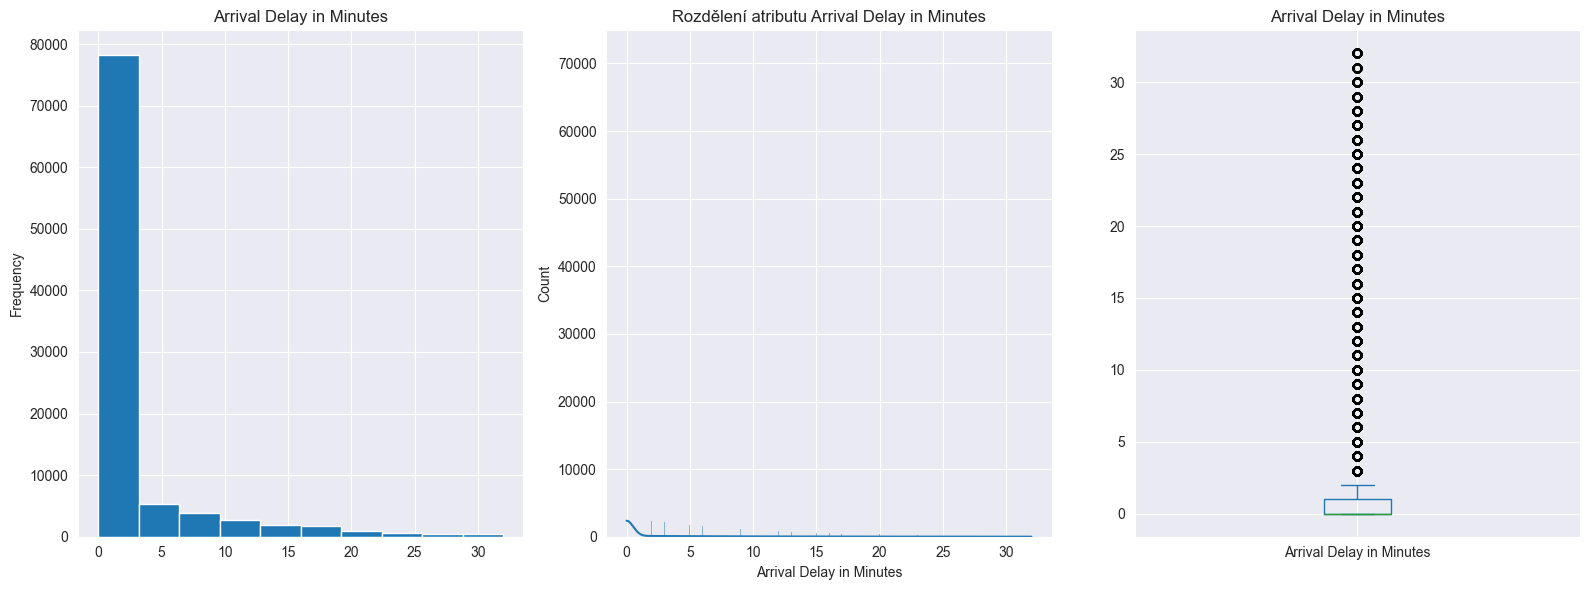

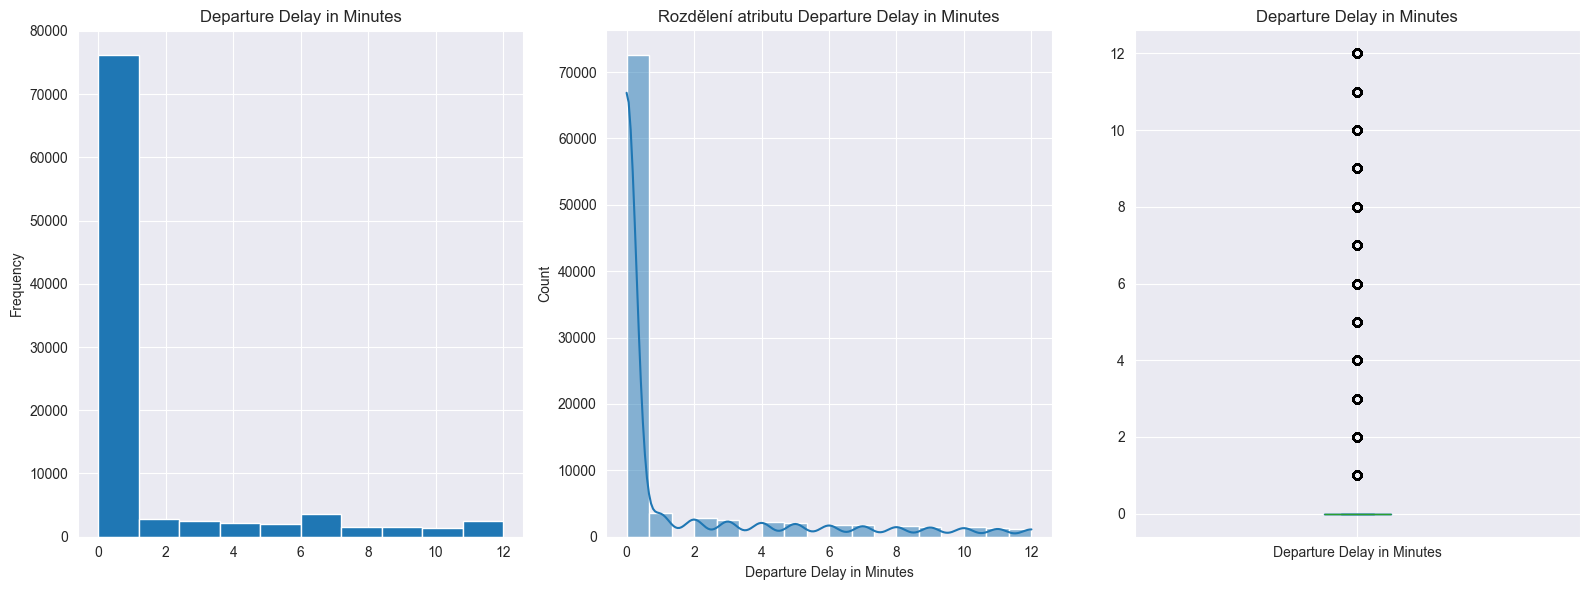

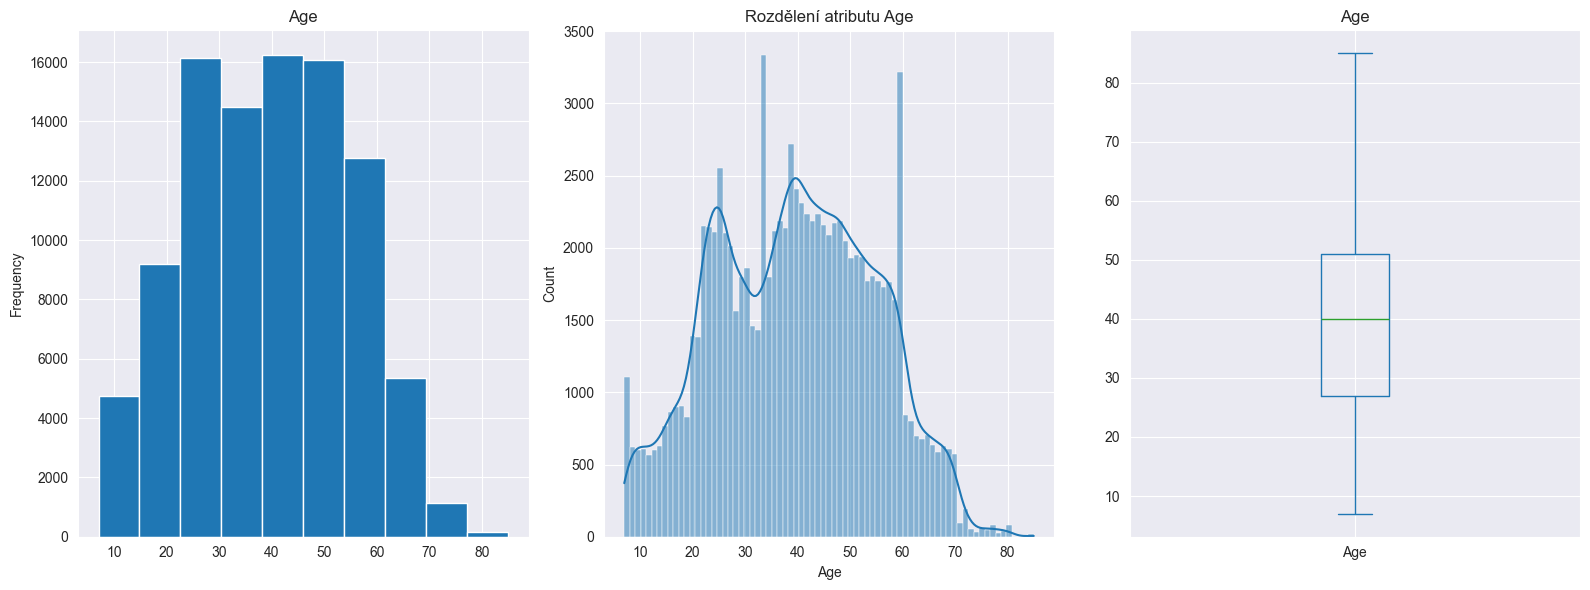

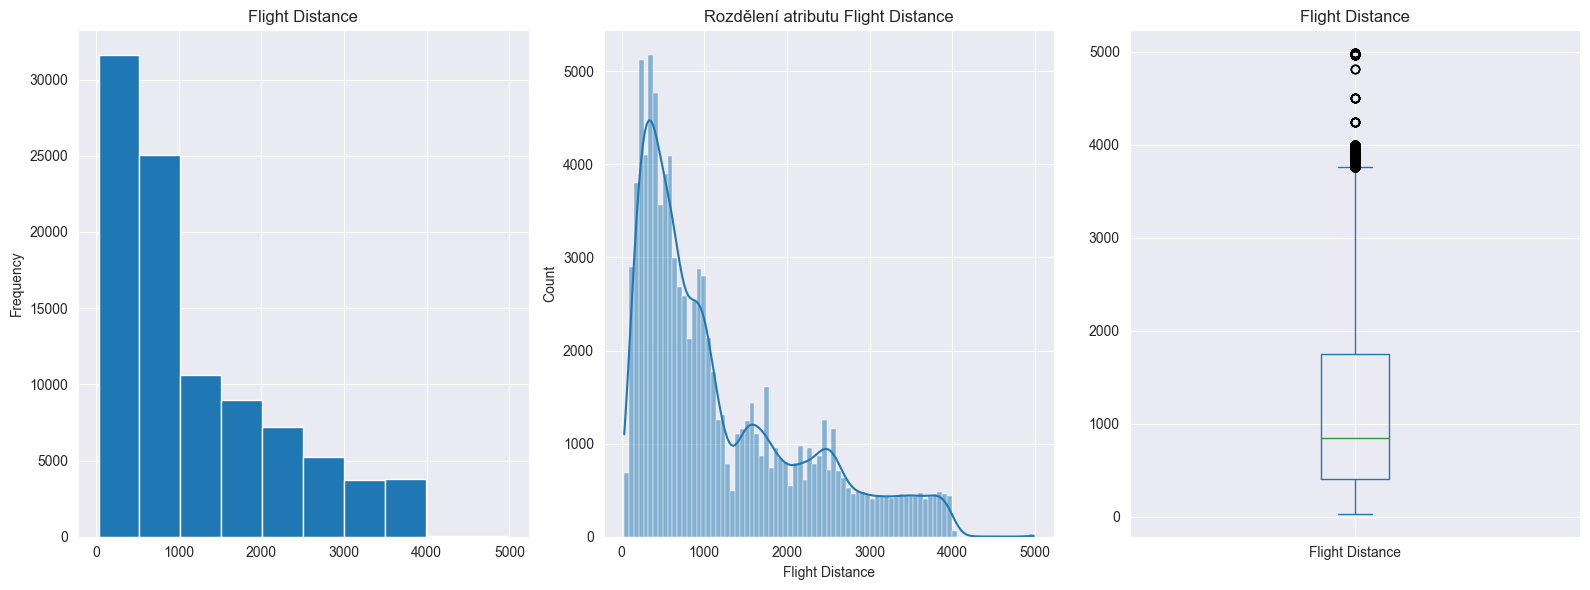

In [27]:
plot_numerical_attributes(df_no_outliers)

Nyní máme odstraněné odlehlé hodnoty z atributů `Arrival Delay in Minutes` a `Departure Delay in Minutes`. Data vypadají mnohem lépe, obzvláště u atributu `Departure Delay in Minutes`, kde jsme měli hodně extrémních hodnot.

### Binární atributy

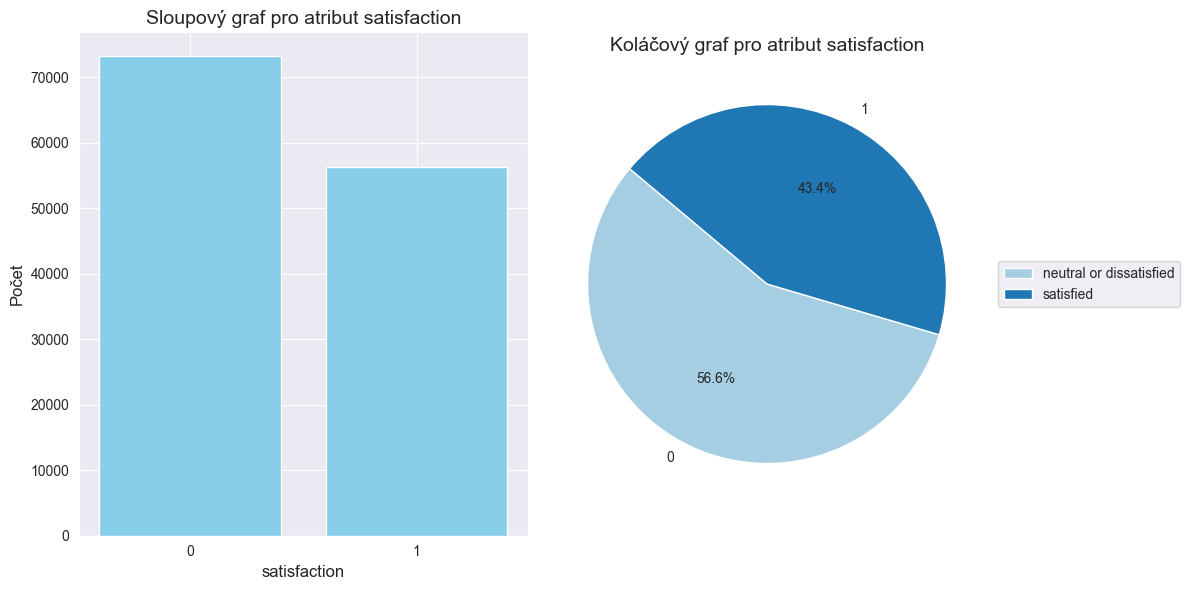

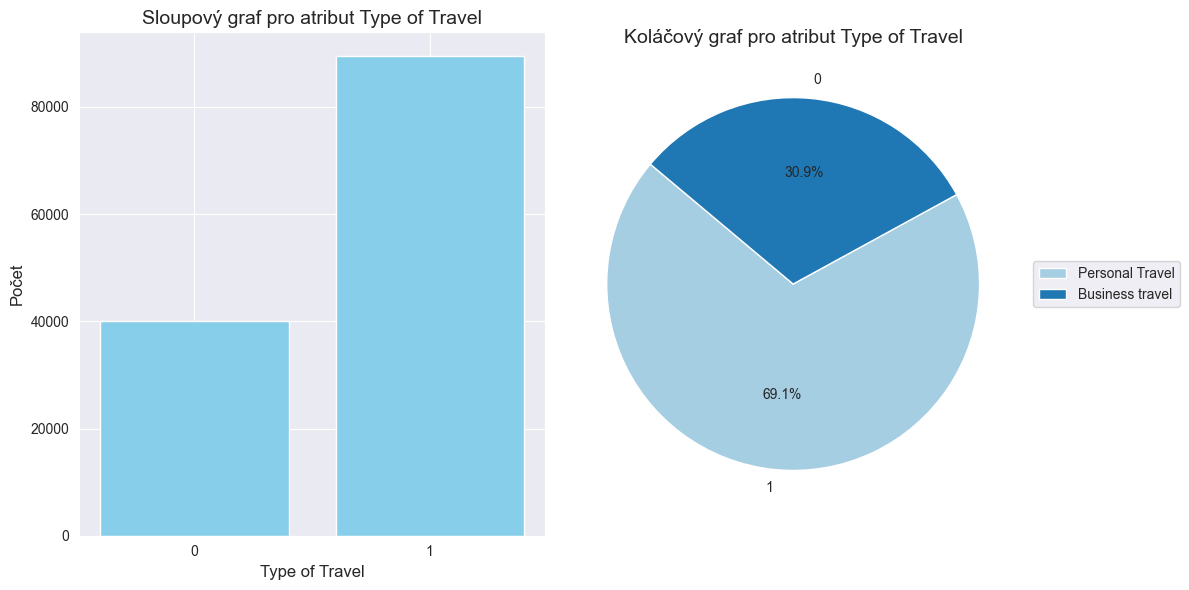

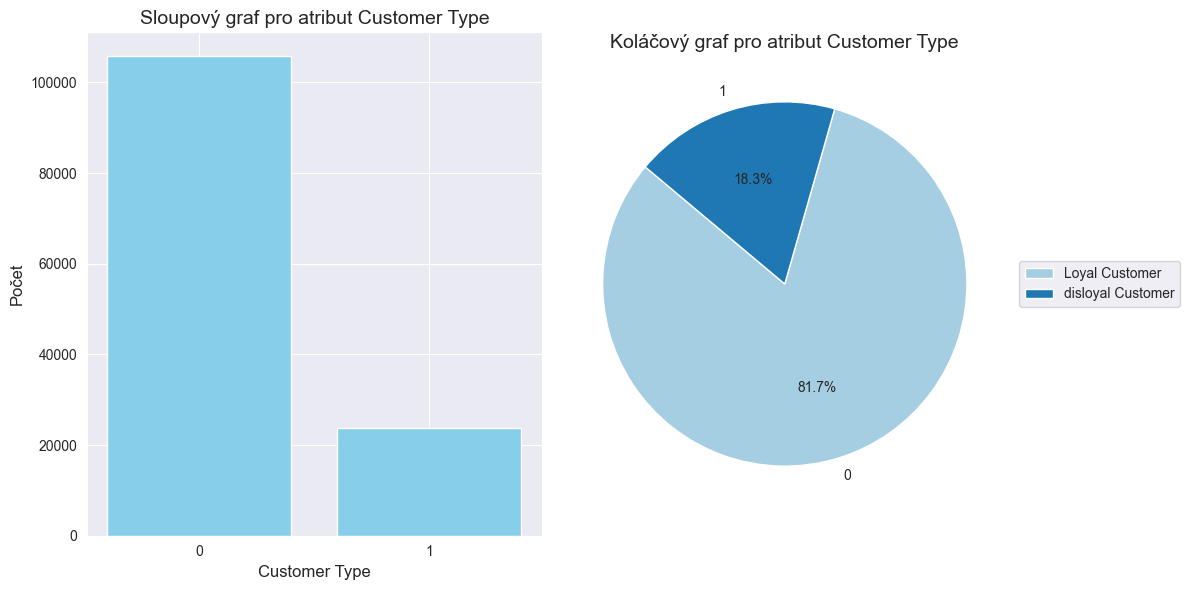

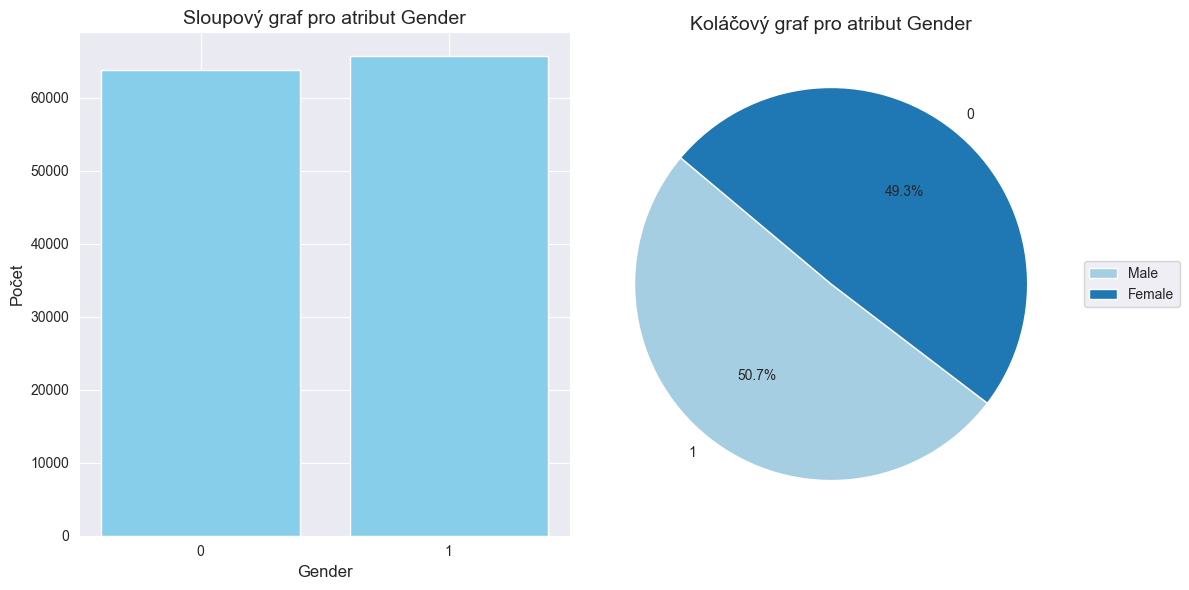

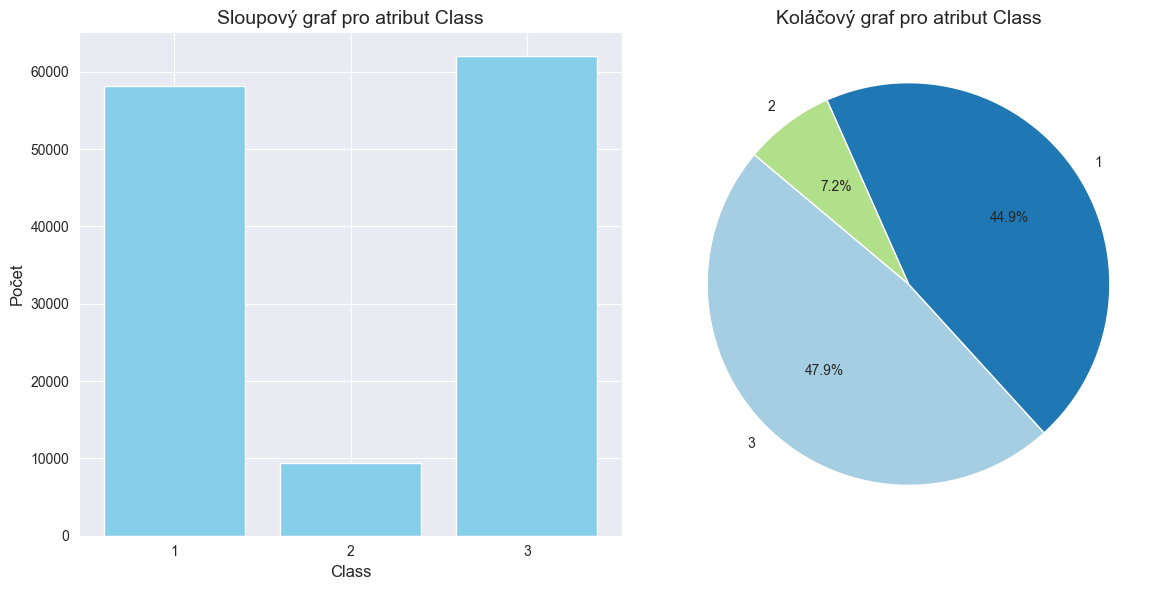

In [28]:
for col in binary_categorical_columns:
    counts = df_encoded[col].value_counts()
    labels = counts.index
    sizes = counts.values

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar plot on the left
    axes[0].bar(labels, sizes, color='skyblue')
    axes[0].set_title(f"Sloupový graf pro atribut {col}", fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel("Počet", fontsize=12)
    axes[0].set_xticks(labels)
    axes[0].tick_params(axis='x')

    # Pie chart on the right
    axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(labels))))
    axes[1].set_title(f"Koláčový graf pro atribut {col}", fontsize=14)

    if col in categorical_dict_mapping:
        axes[1].legend(labels=[k for k, v in categorical_dict_mapping[col].items()], loc='center left',
                       bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

Tady vše vypadá v pořádku. Některé kategorické atributy jsou nevyrovnané, ale obvykle kategorické atributy nemají takový dopad na shlukování, jako numerické atributy.

### Kategorické atributy

In [29]:
categories_plot_mapping = {
    "0": "Vysoká nespokojenost",
    "1": "Nespokojenost",
    "2": "Neutrální",
    "3": "Spokojenost",
    "4": "Skvělá spokojenost",
    "5": "Nejvyšší spokojenost"
}

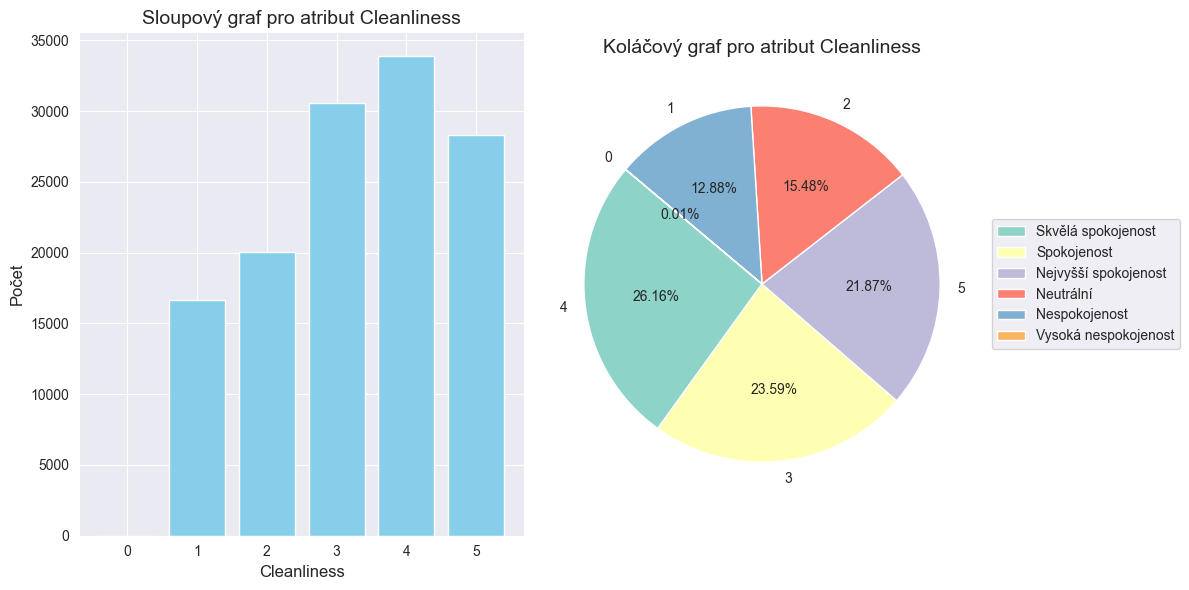

Skvělá spokojenost: 33871 => 26.1578%
Spokojenost: 30552 => 23.5946%
Nejvyšší spokojenost: 28321 => 21.8717%
Neutrální: 20049 => 15.4834%
Nespokojenost: 16680 => 12.8816%
Vysoká nespokojenost: 14 => 0.0108%


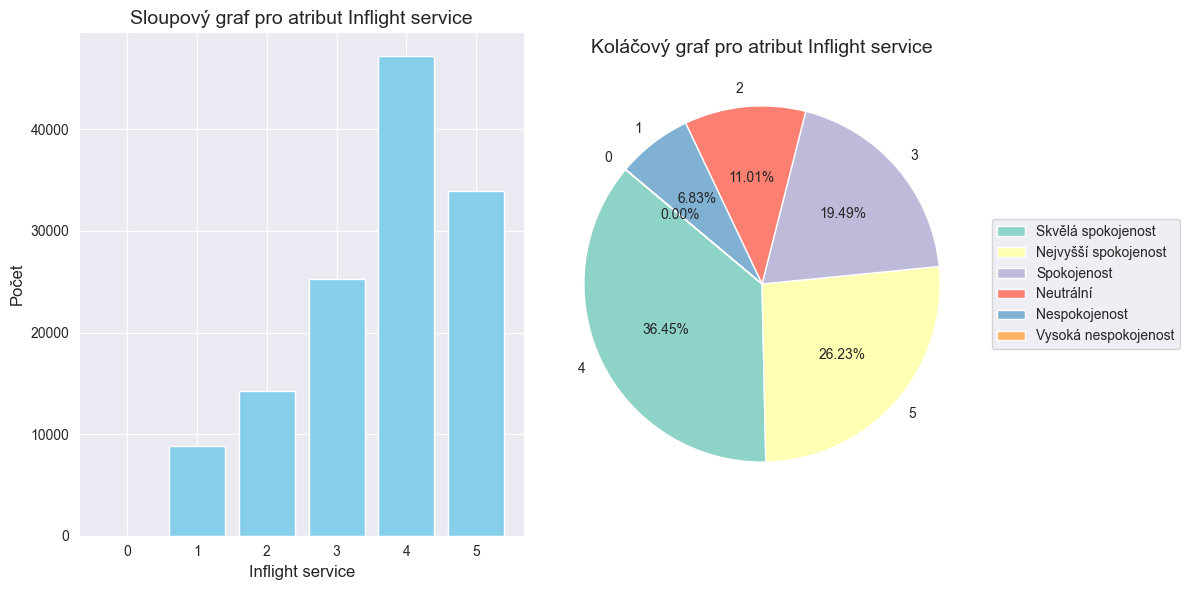

Skvělá spokojenost: 47198 => 36.4500%
Nejvyšší spokojenost: 33962 => 26.2281%
Spokojenost: 25232 => 19.4861%
Neutrální: 14252 => 11.0065%
Nespokojenost: 8838 => 6.8254%
Vysoká nespokojenost: 5 => 0.0039%


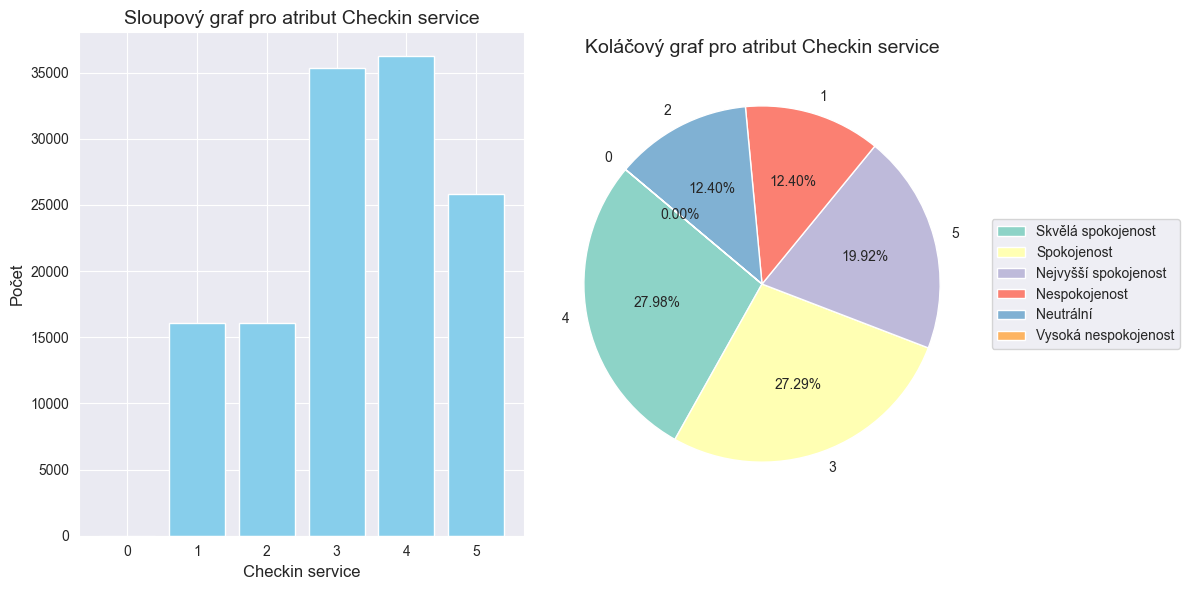

Skvělá spokojenost: 36229 => 27.9789%
Spokojenost: 35343 => 27.2946%
Nejvyšší spokojenost: 25800 => 19.9248%
Nespokojenost: 16058 => 12.4012%
Neutrální: 16056 => 12.3997%
Vysoká nespokojenost: 1 => 0.0008%


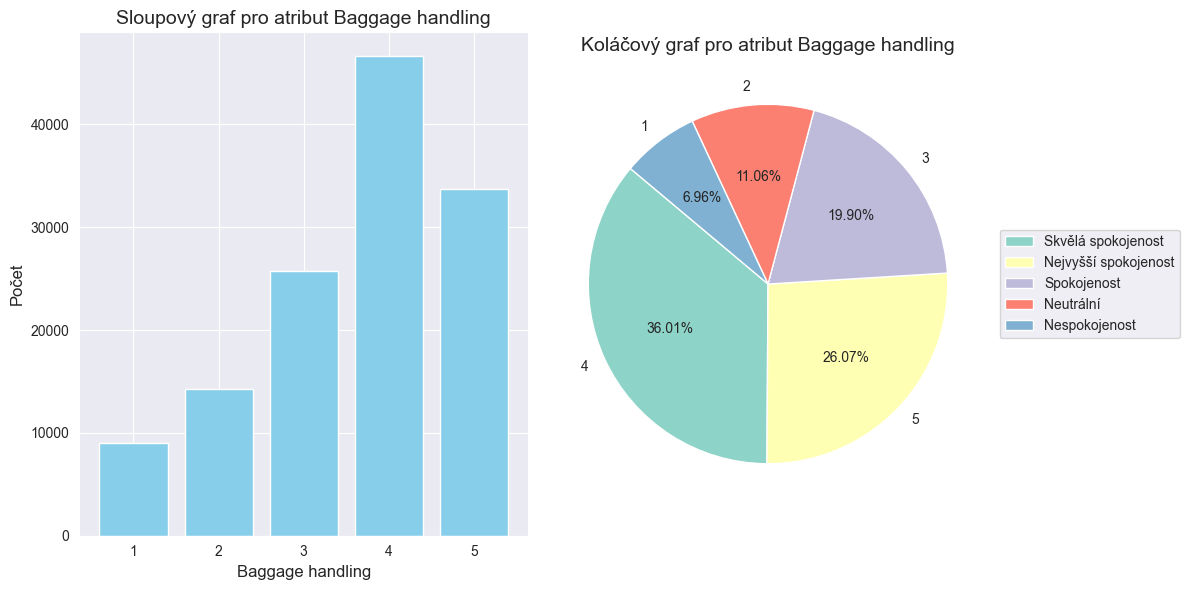

Skvělá spokojenost: 46631 => 36.0121%
Nejvyšší spokojenost: 33761 => 26.0729%
Spokojenost: 25771 => 19.9024%
Neutrální: 14316 => 11.0559%
Nespokojenost: 9008 => 6.9567%


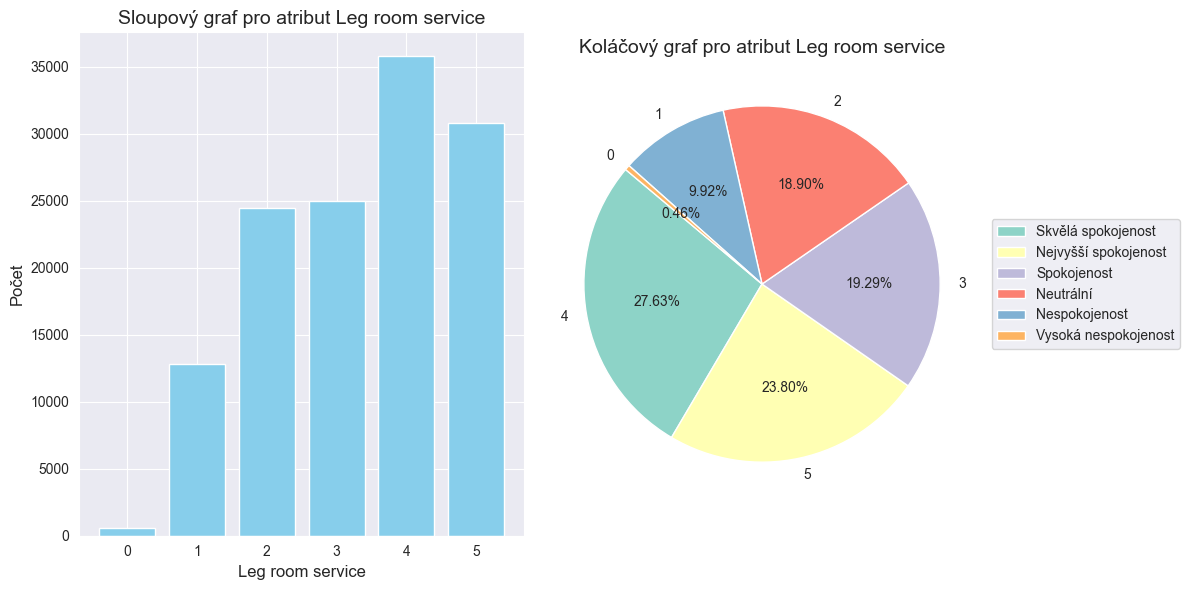

Skvělá spokojenost: 35779 => 27.6313%
Nejvyšší spokojenost: 30815 => 23.7978%
Spokojenost: 24982 => 19.2931%
Neutrální: 24469 => 18.8969%
Nespokojenost: 12846 => 9.9207%
Vysoká nespokojenost: 596 => 0.4603%


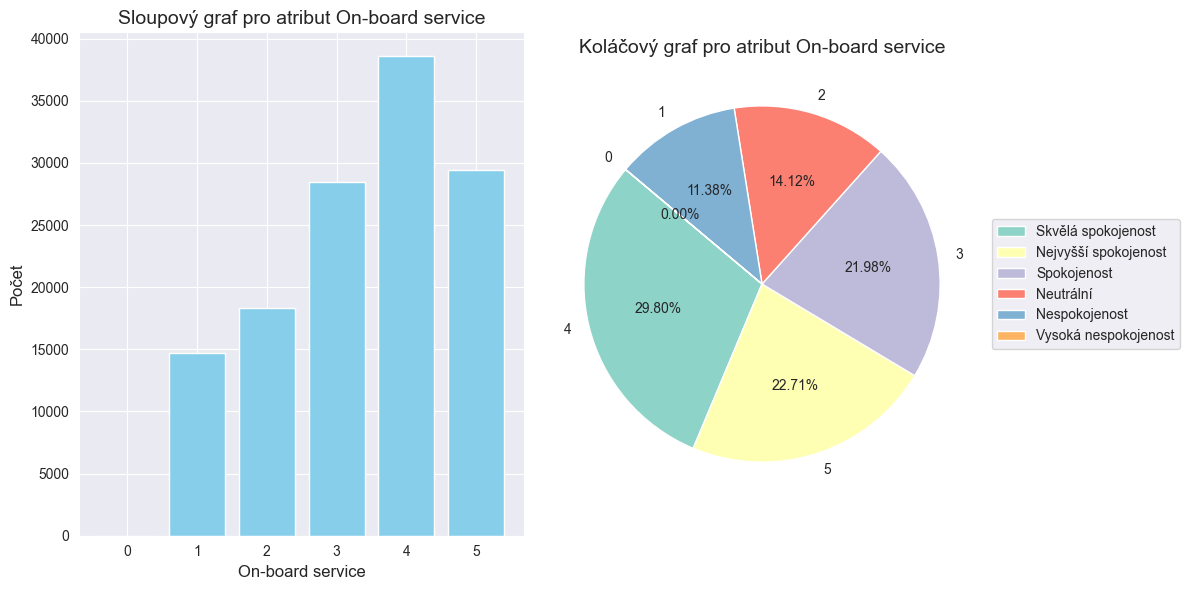

Skvělá spokojenost: 38587 => 29.7999%
Nejvyšší spokojenost: 29407 => 22.7104%
Spokojenost: 28460 => 21.9790%
Neutrální: 18290 => 14.1250%
Nespokojenost: 14738 => 11.3818%
Vysoká nespokojenost: 5 => 0.0039%


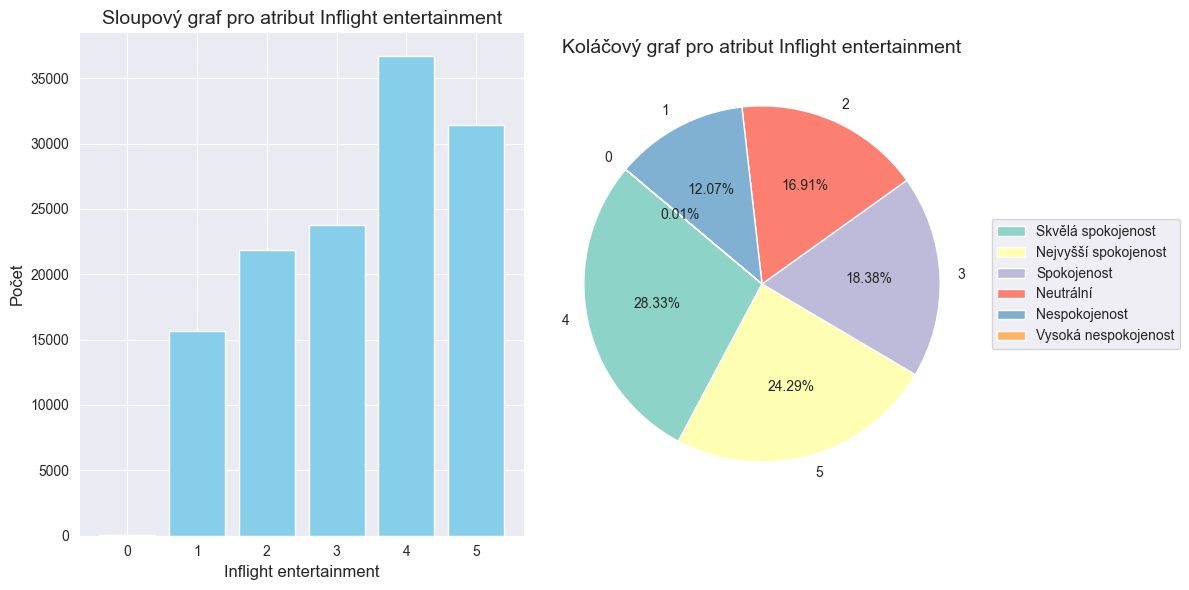

Skvělá spokojenost: 36682 => 28.3287%
Nejvyšší spokojenost: 31451 => 24.2889%
Spokojenost: 23805 => 18.3841%
Neutrální: 21897 => 16.9106%
Nespokojenost: 15634 => 12.0738%
Vysoká nespokojenost: 18 => 0.0139%


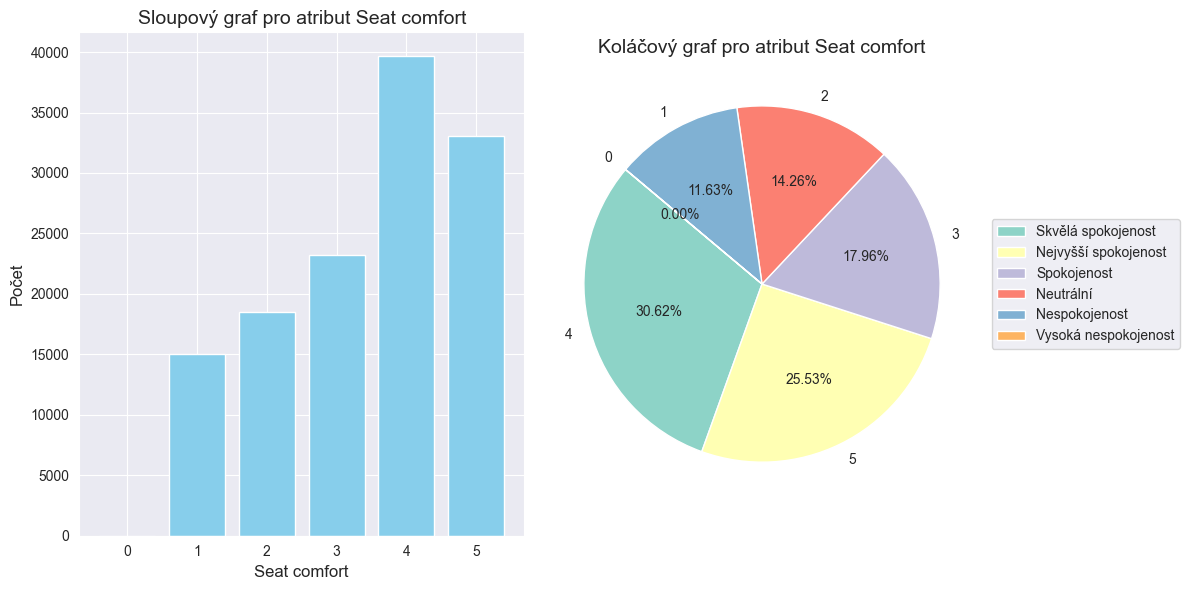

Skvělá spokojenost: 39651 => 30.6216%
Nejvyšší spokojenost: 33056 => 25.5284%
Spokojenost: 23258 => 17.9616%
Neutrální: 18462 => 14.2578%
Nespokojenost: 15059 => 11.6297%
Vysoká nespokojenost: 1 => 0.0008%


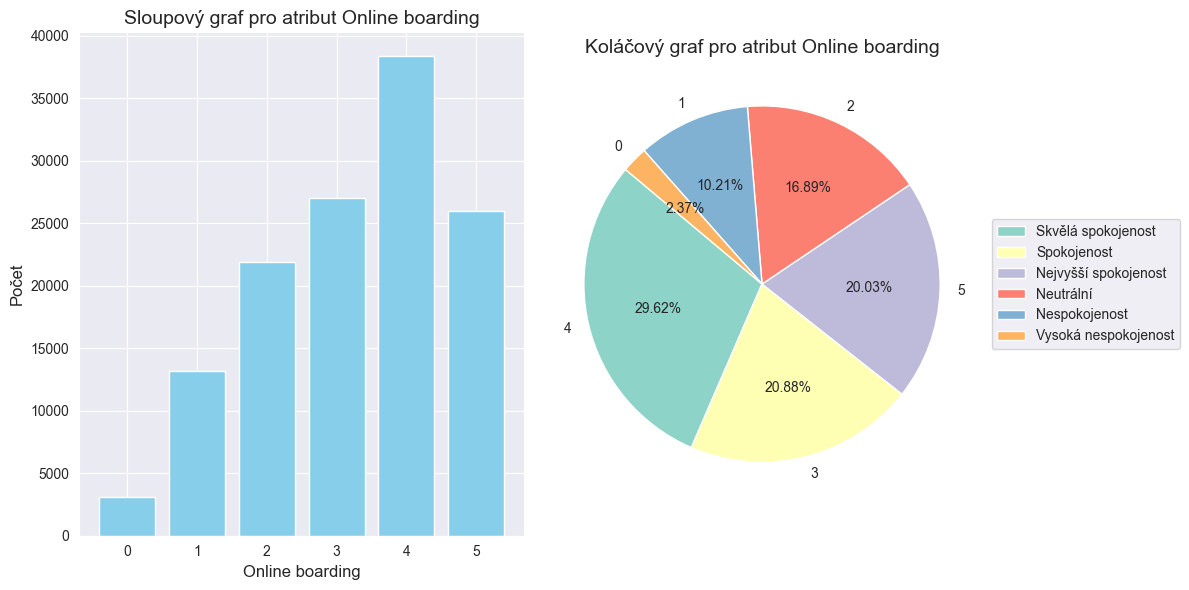

Skvělá spokojenost: 38353 => 29.6192%
Spokojenost: 27040 => 20.8824%
Nejvyšší spokojenost: 25941 => 20.0337%
Neutrální: 21866 => 16.8866%
Nespokojenost: 13216 => 10.2064%
Vysoká nespokojenost: 3071 => 2.3717%


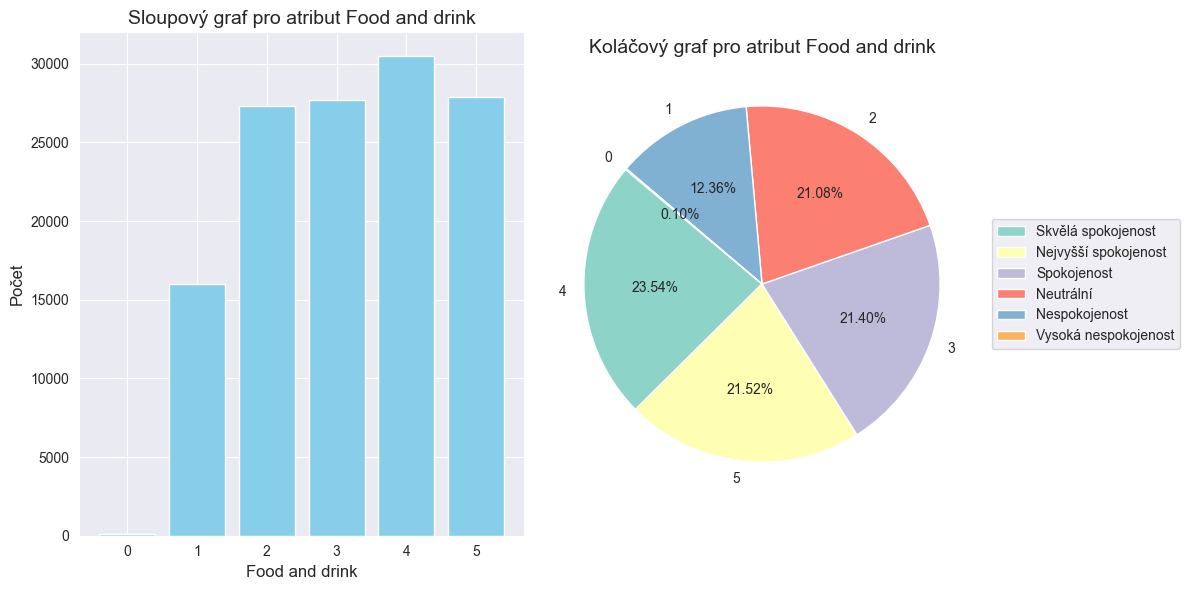

Skvělá spokojenost: 30477 => 23.5367%
Nejvyšší spokojenost: 27865 => 21.5195%
Spokojenost: 27712 => 21.4014%
Neutrální: 27293 => 21.0778%
Nespokojenost: 16010 => 12.3642%
Vysoká nespokojenost: 130 => 0.1004%


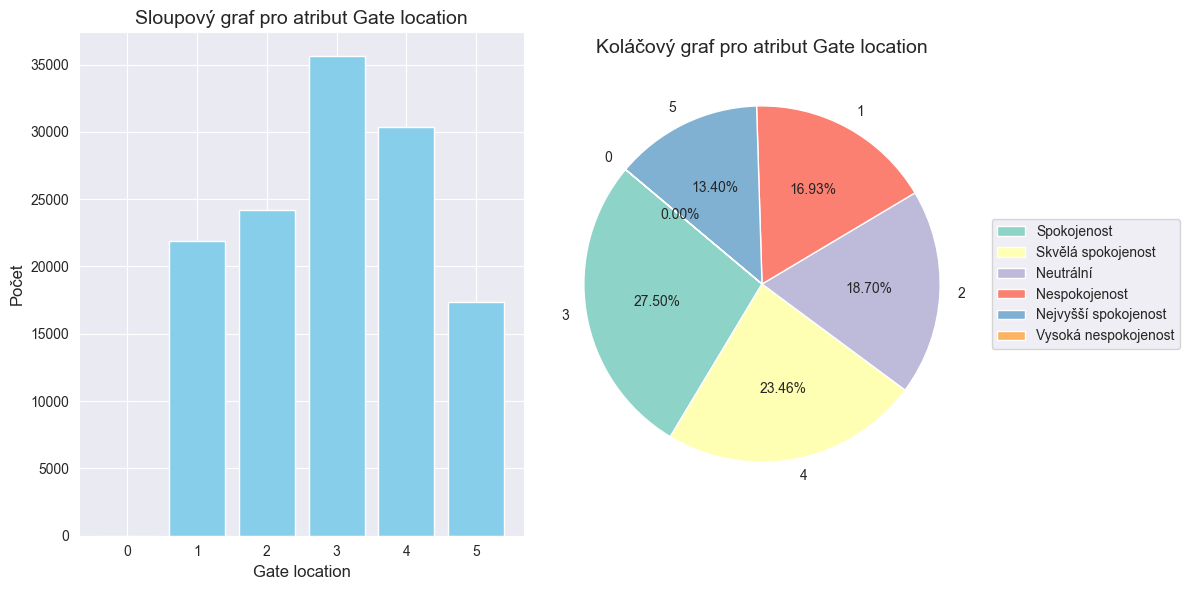

Spokojenost: 35611 => 27.5016%
Skvělá spokojenost: 30376 => 23.4587%
Neutrální: 24219 => 18.7038%
Nespokojenost: 21926 => 16.9330%
Nejvyšší spokojenost: 17354 => 13.4021%
Vysoká nespokojenost: 1 => 0.0008%


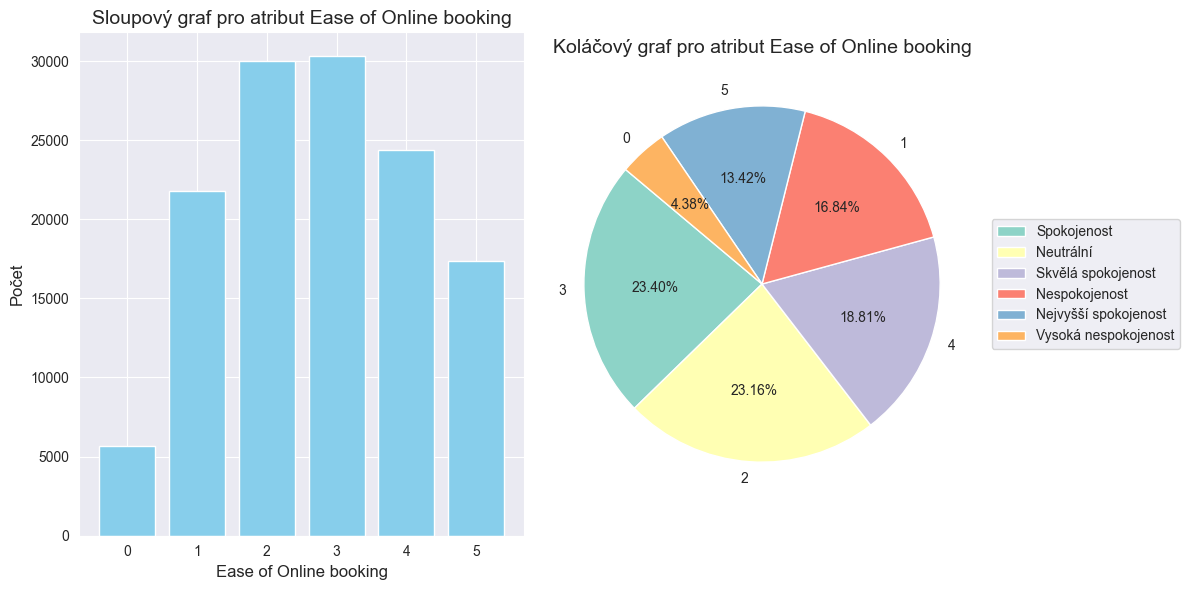

Spokojenost: 30297 => 23.3977%
Neutrální: 29983 => 23.1552%
Skvělá spokojenost: 24362 => 18.8142%
Nespokojenost: 21808 => 16.8418%
Nejvyšší spokojenost: 17371 => 13.4152%
Vysoká nespokojenost: 5666 => 4.3757%


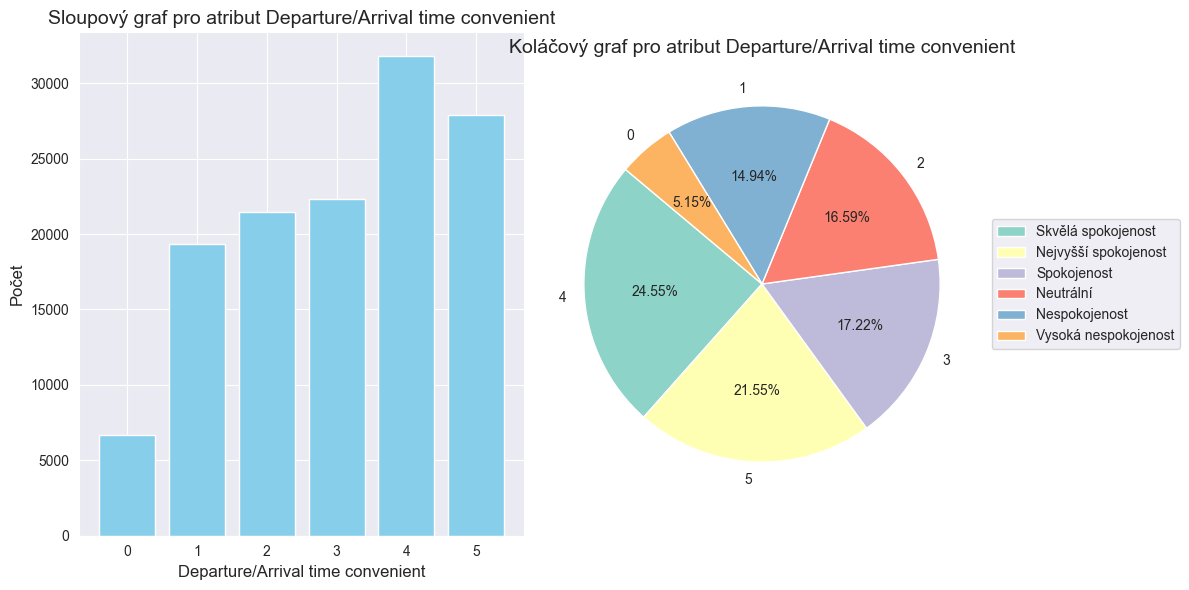

Skvělá spokojenost: 31786 => 24.5476%
Nejvyšší spokojenost: 27906 => 21.5512%
Spokojenost: 22302 => 17.2234%
Neutrální: 21478 => 16.5870%
Nespokojenost: 19351 => 14.9444%
Vysoká nespokojenost: 6664 => 5.1465%


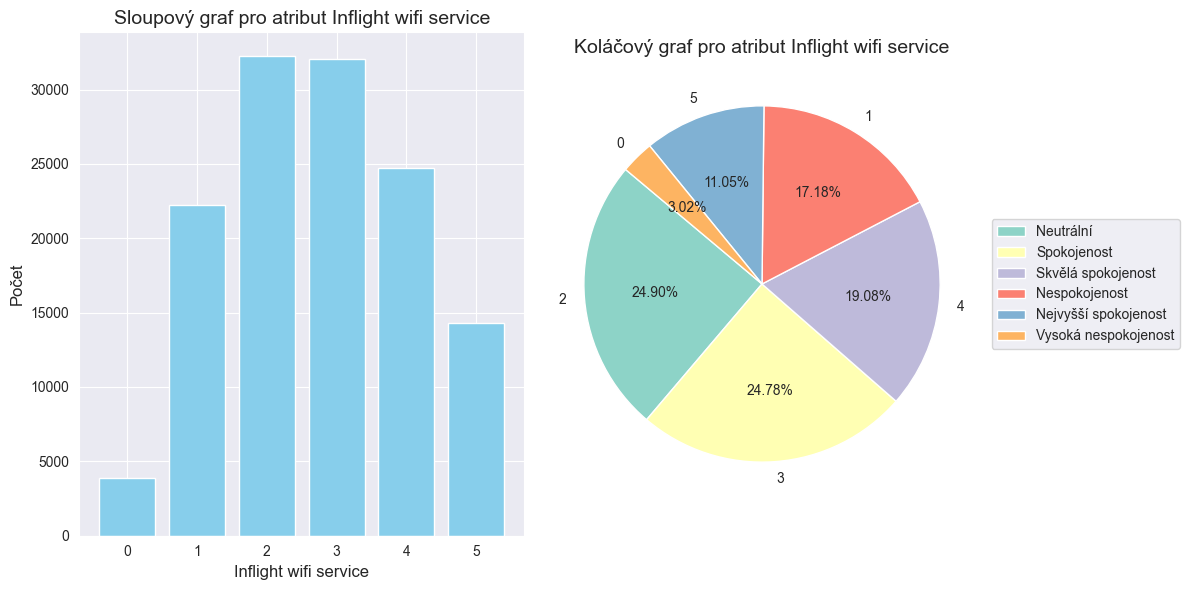

Neutrální: 32236 => 24.8952%
Spokojenost: 32087 => 24.7801%
Skvělá spokojenost: 24702 => 19.0768%
Nespokojenost: 22250 => 17.1832%
Nejvyšší spokojenost: 14304 => 11.0467%
Vysoká nespokojenost: 3908 => 3.0181%


In [30]:
for col in category_categorical_columns:
    counts = df_encoded[col].value_counts()
    labels = counts.index
    sizes = counts.values

    # Sort by size (values in descending order)
    sorted_sizes, sorted_labels = zip(*sorted(zip(sizes, labels), reverse=True))

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Bar plot on the left
    axes[0].bar(sorted_labels, sorted_sizes, color='skyblue')
    axes[0].set_title(f"Sloupový graf pro atribut {col}", fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel("Počet", fontsize=12)
    axes[0].set_xticks(sorted_labels)
    axes[0].tick_params(axis='x')

    # Pie chart on the right
    num_colors = len(sorted_labels)
    colors = plt.cm.Set3(range(num_colors))

    axes[1].pie(sorted_sizes, labels=sorted_labels, autopct='%1.2f%%', startangle=140,
                colors=colors)
    axes[1].set_title(f"Koláčový graf pro atribut {col}", fontsize=14)

    # Create sorted legend labels from categories_plot_mapping
    legend_labels = [categories_plot_mapping.get(str(label), str(label)) for label in sorted_labels]
    axes[1].legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()

    for label, size in zip(sorted_labels, sorted_sizes):
        category_name = categories_plot_mapping.get(str(label), str(label))
        print(f"{category_name}: {size} => {(size / len(df_encoded) * 100):.4f}%")

Všechny kategorické atributy vypadají v pořádku. Lidé mají tendence dávat *nulové* hodnocení velmi zřídka, což je pochopitelné, protože by se mělo jednat o extrémní případy. Většina hodnocení se pohybuje v rozmezí mezi *2* a *4*. Hodnocení *5* není rak vzácné, ale spíše časté. Možné vysvětlení je to. že lidé často neměli co vytknout, a tak daly plné hodnocení.

## Škálování numerických dat

Škálování numerických dat je důležité, protože může ovlivnit výsledky shlukovací analýzy. Je důležité, abychom znali všechny okolnosti, abychom zvolili správný škálovací algoritmus. Budeme se rozhodovat mezi třemi hlavními škálovacími algoritmy:
- **StandardScaler**: Nastavuje *průměr* 0 a *směrodatnou odchylku* 1. Vhodný pro *normální data bez odlehlých hodnot*. **Velmi** citlivý na odlehlé hodnoty.
- **MinMaxScaler**: Převádí data do *rozsahu (např. 0–1)*. Používá se, pokud data *nemají normální distribuci* a *nemají odlehlé hodnoty*. **Mírně** citlivý na odlehlé hodnoty.
- **RobustScaler**: Používá *medián* a *IQR*, odolný vůči odlehlým hodnotám. Ideální pro *data s odlehlými hodnotami* a *bez normální distribuce*. **Méně** citlivý na odlehlé hodnoty.

Jelikož jsme se již zbavili odlehlých hodnot, ale stále zde máme data mimo první a třetí kvartil, tak se rozhodneme použít `StandardScaler`.

In [31]:
df_scaled = df_encoded.copy()

In [32]:
for cat in numerical_categorical_columns:
    standard_scaler = StandardScaler()
    df_scaled[cat] = standard_scaler.fit_transform(df_scaled[[cat]])

## Korelace

Korelační matice nám může poskytnout informace o vztazích mezi jednotlivými atributy, což nám může pomoci při výběru atributů pro shlukovací analýzu.

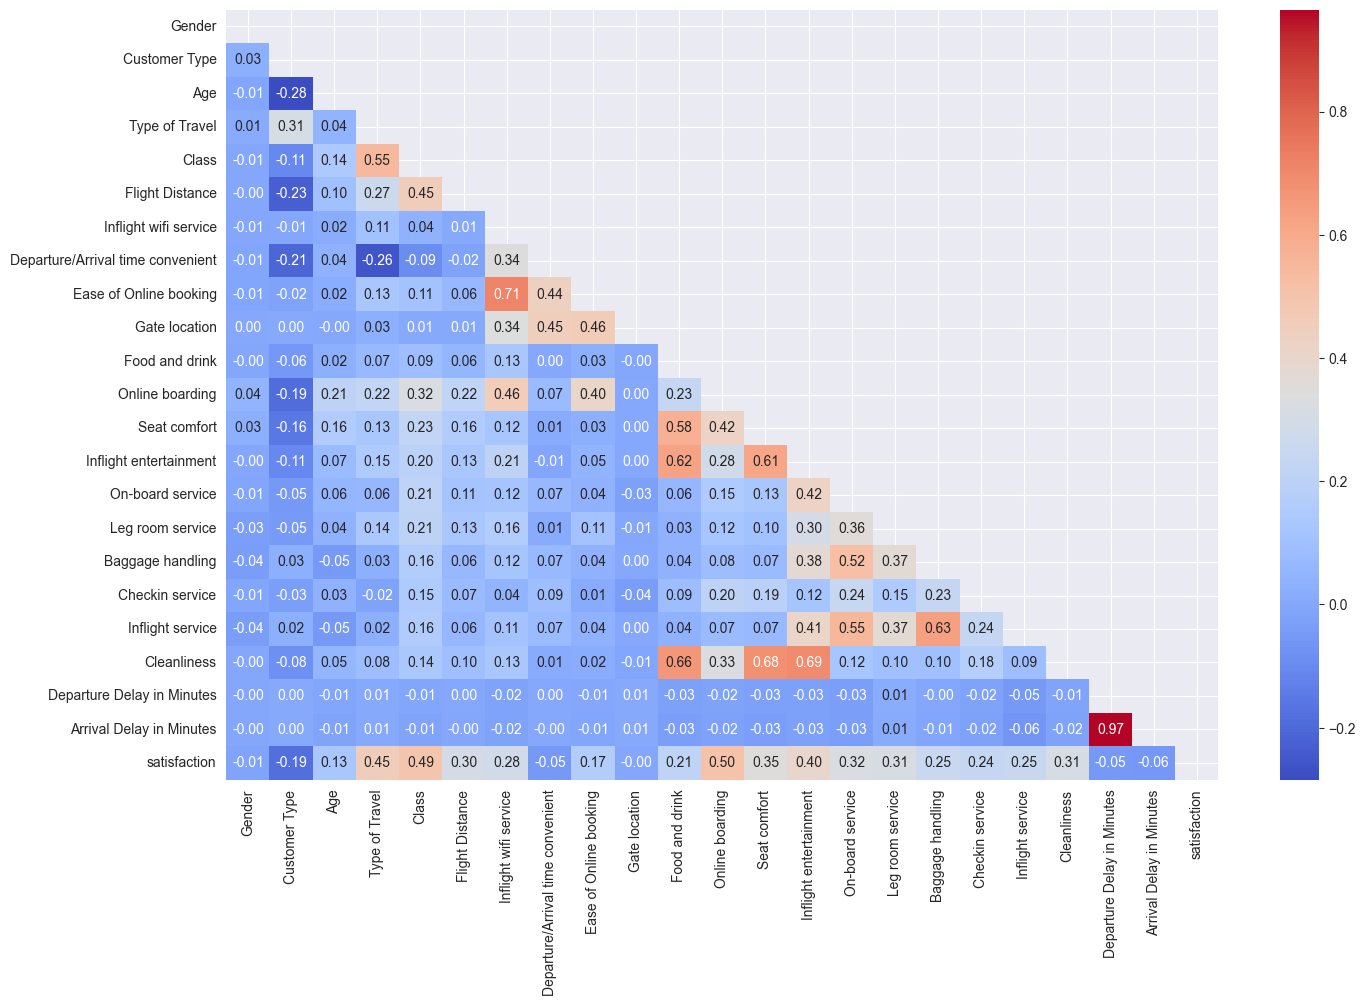

In [33]:
mask = np.triu(np.ones_like(df_scaled.corr(), dtype=bool))
plt.figure(figsize=(16, 10))
sns.heatmap(df_scaled.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")
plt.show()

Pro lepší čitelnost jsme použili masku, která nám umožňuje zobrazit pouze dolní trojúhelník korelační matice. Vysoké a nízké korelace můžeme vidět na první pohled. Detailně se podíváme na korelace v následujících krocích.

In [34]:
correlations = df_encoded.corr().unstack().sort_values(ascending=False).drop_duplicates()
correlations = correlations[correlations != 1]

### Vysoké korelace

In [35]:
correlations.head(10)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965291
Inflight wifi service       Ease of Online booking      0.714888
Inflight entertainment      Cleanliness                 0.692491
Cleanliness                 Seat comfort                0.679657
Food and drink              Cleanliness                 0.658026
Inflight service            Baggage handling            0.629492
Inflight entertainment      Food and drink              0.623366
Seat comfort                Inflight entertainment      0.611949
Food and drink              Seat comfort                0.575993
On-board service            Inflight service            0.551460
dtype: float64

1. **Departure Delay in Minutes & Arrival Delay in Minutes (0.965)**:
Silná pozitivní korelace ukazuje, že pokud se zpozdí odlet, pravděpodobně se zpozdí i přílet. To naznačuje, že faktory ovlivňující odlet mají silný dopad na přílet, což je naprosto logické a nijak nás nepřekvapuje. 🕒

2. **Inflight wifi service & Ease of Online booking (0.715)**: 
Pokud má let dobrou wifi službu, ocení ji ti lidé, kteří si snadno zarezervovali let online a kupují si letenky online a obecně se cítí pohodlně s online službami a nakupováním. 📶

3. **Inflight entertainment & Cleanliness (0.692)**: 
pokud má zákazník k dispozici širokou škálu kvalitní zábavy na palubě, pravděpodobně míněno filmy a televizi, ocení také čistotu na palubě. Obecně se, že let je příjemnější, pokud je čistý a rychle ubíhá díky kvalitní zábavě. 🎥 

4. **Cleanliness & Seat comfort (0.680)**:
Čistota na palubě může pozitivně ovlivnit pohodlí sedadel, což naznačuje, že příjemné a čisté prostředí zvyšuje komfort cestujících. 🧼

5. **Food and drink & Cleanliness (0.658)**:
Kvalitní jídlo a nápoje jsou často spojeny s lepší čistotou na palubě, což může znamenat, že letecké společnosti, které se starají o stravu, dbají i na čistotu. 🍽️

6. **Inflight service & Baggage handling (0.629)**: 
Kvalitní palubní služby jsou spojeny s lepší manipulací s bagáží, což naznačuje, že dobrý zážitek z letu zahrnuje i efektivní odbavení. 🧳

7. **Inflight entertainment & Food and drink (0.623)**:
Kvalitní palubní zábava může zlepšit zážitek z jídla a nápojů, což znamená, že zábava a jídlo jdou ruku v ruce. 🍿 

8. **Seat comfort & Inflight entertainment (0.612)**: 
Pohodlí sedadel je často spojeno s kvalitní palubní zábavou, což znamená, že pohodlí sedadel může zlepšit celkový zážitek z letu. 🪑 

9. **Food and drink & Seat comfort (0.576)**: 
Kvalitní jídlo a nápoje mohou přispět k většímu komfortu sedadel, což ukazuje na vzájemnou souvislost mezi těmito faktory. 🥤

10. **On-board service & Inflight service (0.551)**: 
Lepší obsluha na palubě je často spojena s kvalitními palubními službami, což znamená, že dobrá obsluha zlepšuje celkový zážitek. 👩‍✈️


Obecně lze říci, že faktory týkající se pohodlí, zábavy a stravování jsou často spojeny s čistotou a kvalitními službami na palubě. 🛫

### Nízké korelace

In [36]:
correlations.tail(10)

Departure/Arrival time convenient  Class                               -0.090074
Customer Type                      Class                               -0.105603
                                   Inflight entertainment              -0.106157
Seat comfort                       Customer Type                       -0.156383
satisfaction                       Customer Type                       -0.185925
Online boarding                    Customer Type                       -0.189329
Customer Type                      Departure/Arrival time convenient   -0.206916
                                   Flight Distance                     -0.226134
Type of Travel                     Departure/Arrival time convenient   -0.257208
Age                                Customer Type                       -0.284275
dtype: float64

1. **Departure/Arrival time convenient & Class (-0.090)**: 
Tato slabá negativní korelace naznačuje, že hodnocení pohodlí času odletu a příletu má malý vliv na výběr cestovní třídy. Třída a pohodlí času nejsou výrazně propojené. 🕒

2. **Customer Type & Class (-0.106)**: 
Negativní korelace mezi typem zákazníka a třídou cestování naznačuje, že loajální cestující nemají vždy tendenci volit vyšší třídy. Výběr třídy tedy není zásadně ovlivněn tím, zda je cestující loajální. 🧳

3. **Customer Type & Inflight entertainment (-0.106)**:
Slabá negativní korelace ukazuje, že loajální zákazníci nemusí vždy hodnotit palubní zábavu lépe než neloajální. Možná pro ně zábava na palubě není prioritou. 🎬

4. **Seat comfort & Customer Type (-0.156)**: 
Loajální cestující hodnotí pohodlí sedadel o něco méně pozitivně než neloajální. To může znamenat, že mají nižší nároky na komfort nebo jiný pohled na to, co je pro ně pohodlné. 🪑

5. **Satisfaction & Customer Type (-0.186)**: 
Tento negativní vztah naznačuje, že loajální cestující nejsou vždy více spokojení než neloajální. Je možné, že mají vyšší očekávání, která mohou ovlivnit jejich celkovou spokojenost. 😐

6. **Online boarding & Customer Type (-0.189)**:
Loajální cestující mohou být méně spokojeni s online odbavením. Možná dávají přednost osobnímu odbavení nebo mají s online procesem určité problémy. 📲

7. **Customer Type & Departure/Arrival time convenient (-0.207)**: 
Loajální cestující mohou mít nižší hodnocení pohodlí času odletu a příletu, což může znamenat, že preferují jiný časový rámec, který není vždy komfortní. ⏰

8. **Customer Type & Flight Distance (-0.226)**:
Neloajální zákazníci mohou být ochotnější letět na delší vzdálenosti než loajální, což může souviset s jejich volbou destinací nebo typem cestování. 🌍

9. **Type of Travel & Departure/Arrival time convenient (-0.257)**:
Silná negativní korelace ukazuje, že účel cesty (osobní vs. obchodní) má vliv na hodnocení pohodlí času odletu a příletu. Obchodní cestující mohou mít přísnější požadavky na čas. 🏢

10. **Age & Customer Type (-0.284)**:
Silná negativní korelace ukazuje, že mladší cestující bývají neloajální, zatímco starší tendují k větší loajalitě. To může souviset s rozdíly v přístupu k cestování mezi věkovými skupinami. 👴

Největší negativní závislost se vztahují k typu zákazníka, což může naznačovat, že loajální zákazníci mají jiné priority a očekávání než neloajální. 🧳

#  Shluková analýza


## K-Means s využitím výběru atributů

In [37]:
df_kmeans = df_scaled.copy()

### Feature Selection (Výběr atributů)

Eistuje několik metod pro výběr atributů:
- **Variance Threshold**: Odstraní atributy, které mají nízkou variabilitu. Variabilita zde znamená rozdíl mezi jednotlivými hodnotami atributu a na základě toho se rozhodne, zda atribut odstranit nebo ne.
- **SelectKBest**: Vybere *k* nejlepších atributů na základě určité metriky, jako je *ANOVA*, *Chi-Square* nebo *F-Regression*.
- **SelectFromModel**: Vybere atributy na základě modelu, jako je *Random Forest* nebo *Linear Regression*.

Pro jednoduchost zvolíme `Variance Threshold`, protože nám umožňuje snadno odstranit atributy s nízkou variabilitou a je jednoduchý na použití.

Volba `threshold` je klíčová, protože určuje, jak moc variabilita je považována za nízkou. Pokud je `threshold` příliš nízký, můžeme odstranit atributy, které jsou důležité pro shlukování. Pokud je `threshold` příliš vysoký, můžeme nechat atributy, které mají nízkou variabilitu.

In [38]:
threshold_range = np.arange(1.0, 2.1, 0.05)

In [39]:
print(f"Počet atributů před výběrem: {df_kmeans.shape[1]}")
for threshold in threshold_range:
    selector = VarianceThreshold(threshold=threshold)
    df_reduced = selector.fit_transform(df_kmeans)

    print(f"Threshold: {threshold:.2f}, Počet atributů: {df_reduced.shape[1]}")

Počet atributů před výběrem: 23
Threshold: 1.00, Počet atributů: 16
Threshold: 1.05, Počet atributů: 14
Threshold: 1.10, Počet atributů: 14
Threshold: 1.15, Počet atributů: 14
Threshold: 1.20, Počet atributů: 14
Threshold: 1.25, Počet atributů: 14
Threshold: 1.30, Počet atributů: 14
Threshold: 1.35, Počet atributů: 14
Threshold: 1.40, Počet atributů: 12
Threshold: 1.45, Počet atributů: 12
Threshold: 1.50, Počet atributů: 12
Threshold: 1.55, Počet atributů: 12
Threshold: 1.60, Počet atributů: 12
Threshold: 1.65, Počet atributů: 10
Threshold: 1.70, Počet atributů: 9
Threshold: 1.75, Počet atributů: 6
Threshold: 1.80, Počet atributů: 3
Threshold: 1.85, Počet atributů: 2
Threshold: 1.90, Počet atributů: 2
Threshold: 1.95, Počet atributů: 2
Threshold: 2.00, Počet atributů: 1
Threshold: 2.05, Počet atributů: 1


Náš původní dataset má 23 atributů. Abychom se dostali k zajímavějším výsledkům a ulehčili s práci s popisem všeh těch atributů ve shlucích, zvolíme `threshold` na hodnotu `1.7` s celkovým počtem atributů `9`.

In [40]:
selector = VarianceThreshold(threshold=1.7)
df_reduced = selector.fit_transform(df_kmeans)

In [41]:
df_reduced = pd.DataFrame(df_reduced, columns=df_kmeans.columns[selector.get_support()])
print("\n".join(df_reduced.columns))

Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Food and drink
Online boarding
Seat comfort
Inflight entertainment
Leg room service
Cleanliness


Paráda, nyní máme dataset s 9 atributy, které jsou důležité pro shlukování. Ukázalo se, že tyto atributy jsou ty samé, kteé měli vysokou korelaci během explorační analýzy, takže jsme na správné cestě a nijak dále nebudeme zasahovat do výběru atributů.

In [42]:
df_kmeans = df_reduced.copy()

### Určení optimálního počtu shluků

Pro určení optimálního počtu shluků použijeme dvě metody:
- **Elbow Method**: Metoda lokte nám umožňuje určit optimální počet shluků na základě hodnoty `SSE` (Sum of Squared Errors). Cílem je najít bod, kde se hodnota `SSE` začne výrazně snižovat, do té doby, než se začne stabilizovat.
- **Silhouette Score**: Silhouette Score je metrika, která měří, jak jsou jednotlivé shluky odděleny od ostatních shluků. Hodnota se pohybuje od -1 do 1, kde hodnota blížící se 1 znamená, že shluky jsou dobře odděleny.

Sice určíme optimální počet shluků pro K-Means, ale tato metoda může být směrodatná i pro jiné shlukovací algoritmy. 

Rozmezí velikosti shluků bude od 2 do 11.

In [43]:
k_range = range(2, 11)

In [44]:
clustering_scores = []
for k in k_range:
    start_time = time.time()

    clustering = KMeans(n_clusters=k, random_state=42).fit(df_kmeans)
    sil_score = silhouette_score(df_kmeans, clustering.labels_)

    clustering_scores.append({
        "k": k,
        "sse": clustering.inertia_,
        "silhouette": sil_score
    })

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Počet shluků: {k}, SSE: {clustering.inertia_}, "
          f"Silhouette Score: {sil_score}, Celkový čas: {elapsed_time:.4f} sekund")

Počet shluků: 2, SSE: 1624492.3381631048, Silhouette Score: 0.2288336338146037, Celkový čas: 160.7639 sekund
Počet shluků: 3, SSE: 1360451.1004451148, Silhouette Score: 0.20666337945142313, Celkový čas: 138.3299 sekund
Počet shluků: 4, SSE: 1247279.7432166357, Silhouette Score: 0.1740495923671539, Celkový čas: 135.4606 sekund
Počet shluků: 5, SSE: 1163361.3718825798, Silhouette Score: 0.16495780081886366, Celkový čas: 142.8441 sekund
Počet shluků: 6, SSE: 1098174.7833420334, Silhouette Score: 0.17486351978619086, Celkový čas: 149.7484 sekund
Počet shluků: 7, SSE: 1048402.9315852241, Silhouette Score: 0.16324720725294964, Celkový čas: 150.0875 sekund
Počet shluků: 8, SSE: 1007520.5426832491, Silhouette Score: 0.14909427752271048, Celkový čas: 158.2027 sekund
Počet shluků: 9, SSE: 955543.4245908879, Silhouette Score: 0.15488059406921356, Celkový čas: 140.4240 sekund
Počet shluků: 10, SSE: 926951.2914738184, Silhouette Score: 0.15055523892687073, Celkový čas: 139.6683 sekund


In [45]:
fg_clustering_scores = pd.DataFrame.from_dict(clustering_scores)
df_clustering_scores = fg_clustering_scores.set_index("k")

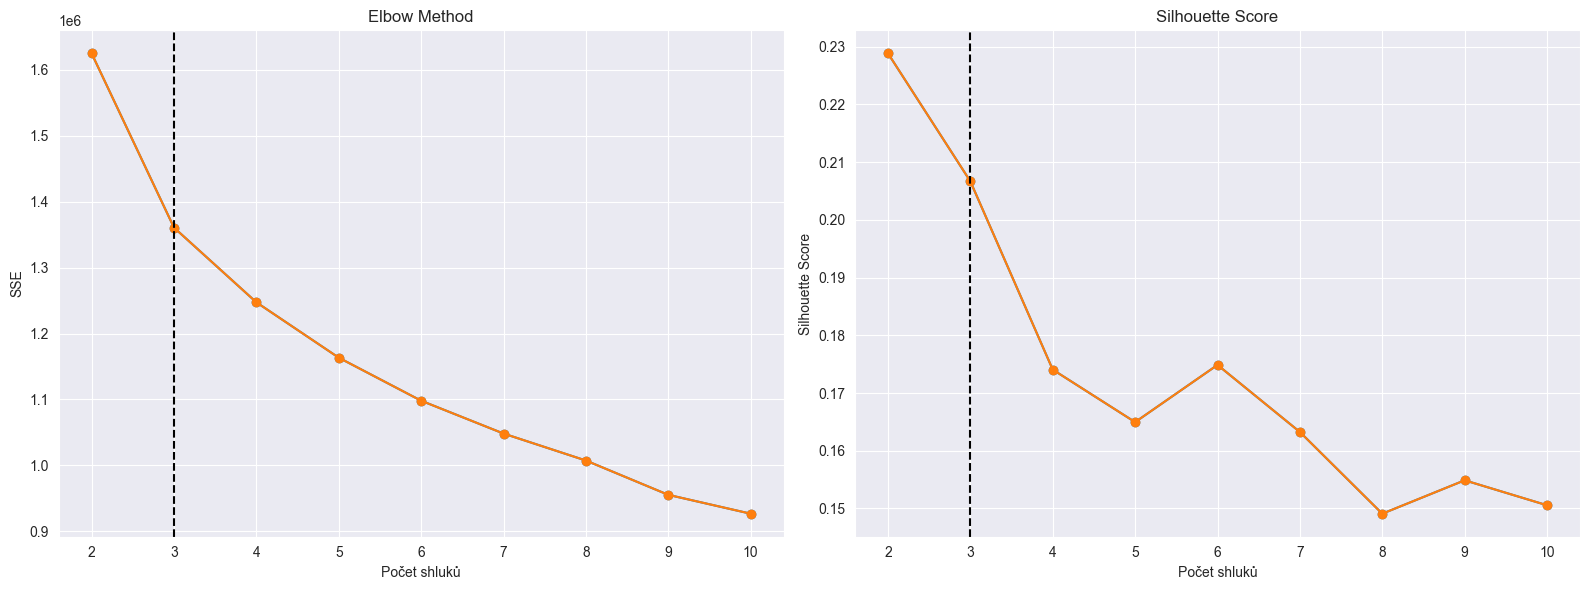

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method
df_clustering_scores.sse.plot(ax=ax1, marker='o')
ax1.plot(df_clustering_scores.index, df_clustering_scores["sse"], marker='o')
ax1.set_title("Elbow Method")
ax1.set_xlabel("Počet shluků")
ax1.set_ylabel("SSE")
ax1.axvline(x=3, color='black', linestyle='--')

# Silhouette Score
df_clustering_scores.silhouette.plot(ax=ax2, marker='o')
ax2.plot(df_clustering_scores.index, df_clustering_scores["silhouette"], marker='o')
ax2.set_title("Silhouette Score")
ax2.set_xlabel("Počet shluků")
ax2.set_ylabel("Silhouette Score")
ax2.axvline(x=3, color='black', linestyle='--')

plt.tight_layout()
plt.show()

Z grafů můžeme vidět, že v grafu metody lokte je vidět, že dochází k výraznému snížení hodnoty `SSE` při *3* shlucích. Silhouette Score je v těchto hodnotách vysoké, což znamená, že shluky jsou dobře oddělené. Proto zvolíme *3* shluky jako optimální počet shluků pro K-Means.

### Provedení shlukování

In [47]:
df_kmeans_chosen_k = 3

In [48]:
kmeans = KMeans(n_clusters=df_kmeans_chosen_k, random_state=42)
kmeans.fit(df_kmeans)

KMeans(n_clusters=3, random_state=42)

In [49]:
df_kmeans["Cluster"] = kmeans.labels_
for cluster in df_kmeans["Cluster"].unique():
    print(f"Počet záznamů ve shluku {cluster}: {len(df_kmeans[df_kmeans['Cluster'] == cluster])} / "
          f"{len(df_kmeans)} ({len(df_kmeans[df_kmeans['Cluster'] == cluster]) / len(df_kmeans) * 100:.2f}%)")

Počet záznamů ve shluku 0: 47259 / 129487 (36.50%)
Počet záznamů ve shluku 1: 42083 / 129487 (32.50%)
Počet záznamů ve shluku 2: 40145 / 129487 (31.00%)


Počet záznamů ve shlucích je poměrně vyrovnaný, což je dobré znamení. Nyní se podíváme na distribuci atributů ve shlucích.

### Vizualizace shluků

Pokud chceme vizualizovat shluky v 2D na základě všech atributů, můžeme použít PCA (Principal Component Analysis) k redukci dimenzionality dat. PCA nám umožňuje transformovat data do nových souřadnic, kde první dvě komponenty obsahují nejvíce informací o datech.

#### PCA

Pokud chceme vizualizovat shluky v 2D na základě všech atributů, můžeme použít PCA (Principal Component Analysis) k redukci dimenzionality dat. PCA nám umožňuje transformovat data do nových souřadnic, kde první dvě komponenty obsahují nejvíce informací o datech.

##### PCA s původními daty

In [50]:
pca = PCA(n_components=2)
pca.fit(df_scaled)

PCA(n_components=2)

In [51]:
df_pca_original = pca.transform(df_scaled)

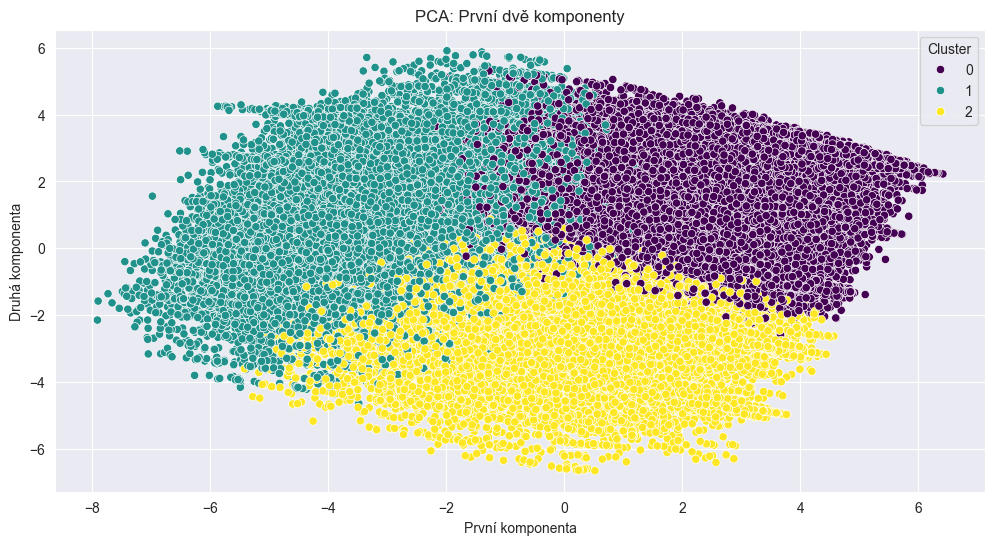

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_pca_original[:, 0], y=df_pca_original[:, 1], hue=df_kmeans["Cluster"], palette='viridis')
plt.title("PCA: První dvě komponenty")
plt.xlabel("První komponenta")
plt.ylabel("Druhá komponenta")
plt.show()

Vidíme, že při použití PCA jsou shluky mnohem lépe oddělené, ale stále to není ono. Tato vizualizace nám umožňuje vidět, jak jsou shluky oddělené v 2D prostoru. Nyní se podíváme na distribuci jednotlivých shluků pomocí krabicových grafů.

##### PCA s redukovanými daty

In [53]:
pca = PCA(n_components=2)
pca.fit(df_kmeans)

PCA(n_components=2)

In [54]:
df_pca_reduced = pca.transform(df_kmeans)

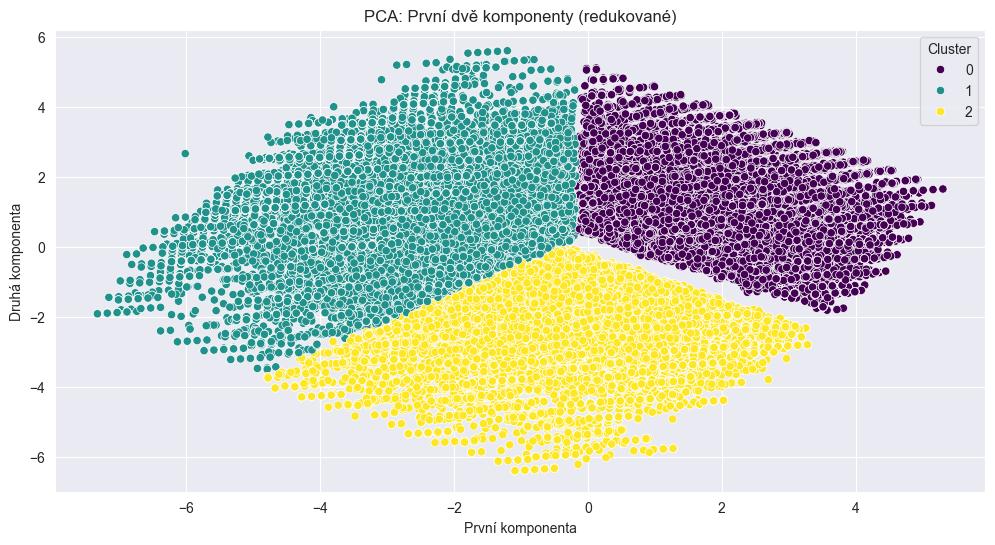

In [55]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df_pca_reduced[:, 0], y=df_pca_reduced[:, 1], hue=df_kmeans["Cluster"], palette='viridis')
plt.title("PCA: První dvě komponenty (redukované)")
plt.xlabel("První komponenta")
plt.ylabel("Druhá komponenta")
plt.show()

Nyní jsou shluky mnohem lépe oddělené a můžeme vidět, jak jsou shluky distribuované v 2D prostoru. Tato vizualizace nám říká, že shluky jsou dobře oddělené a že K-Means funguje dobře.

#### Krabicové grafy

Podíváme se na distribuci jednotlivých shluků pomocí krabicových grafů. Tento detailní pohled nám umožní vidět, jak jsou shluky oddělené pomocí jednotlivých atributů a kde se naopak shodují.

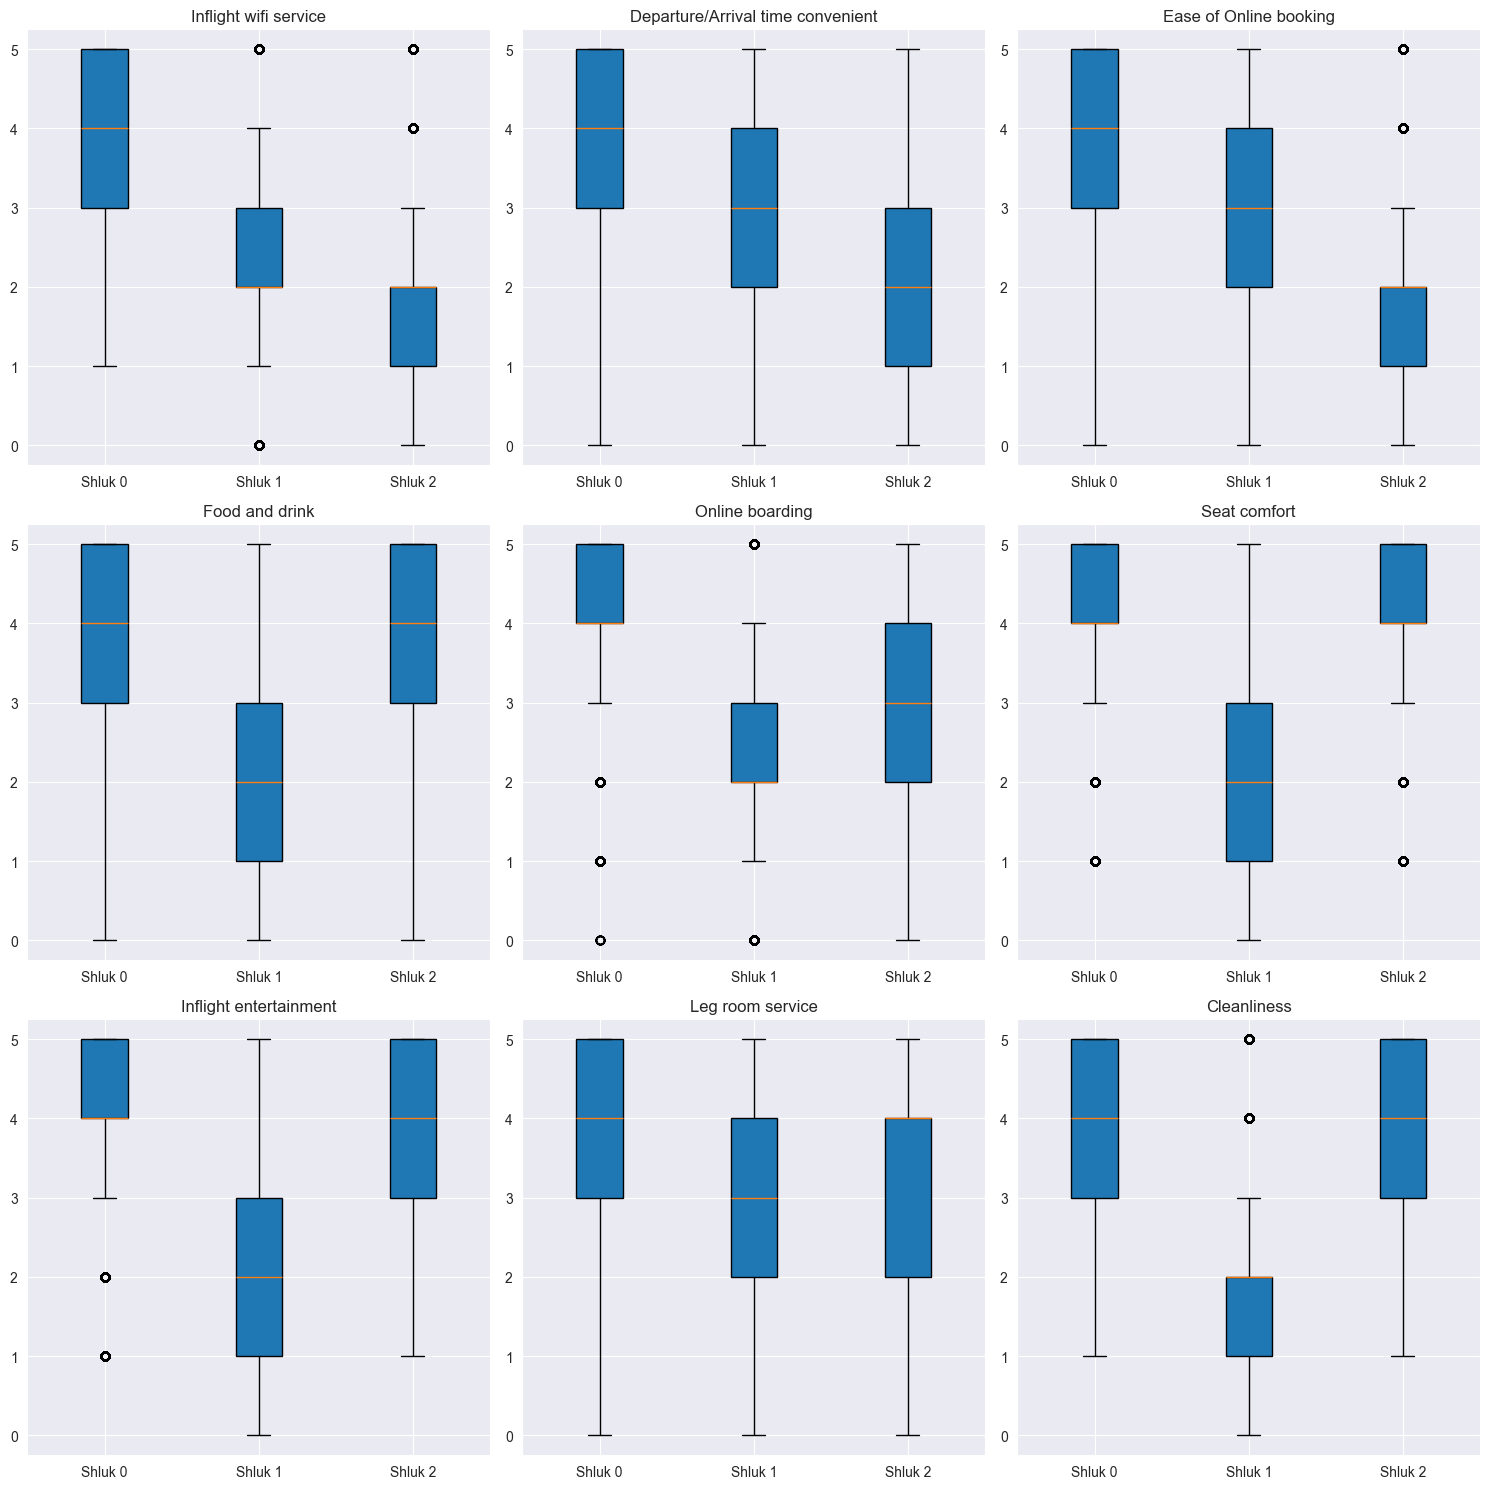

In [56]:
feature_columns = df_kmeans.columns[:-1]  # Exclude the last column (Cluster ID)

num_features = len(feature_columns)
num_rows = np.ceil(num_features / 3).astype(int)

_, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(feature_columns):
    axes[i].boxplot([df_kmeans[df_kmeans["Cluster"] == cluster][column] for cluster in df_kmeans["Cluster"].unique()],
                    patch_artist=True)
    axes[i].set_title(f"{column}")
    axes[i].set_xticklabels([f"Shluk {cluster}" for cluster in df_kmeans["Cluster"].unique()])

for j in range(i + 1, len(axes)):  # Hide the remaining empty subplots
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Vypadá to, že zůstali jen kategoriální atributy, což nás ani zas tak nepřekvapuje, protože jsme je předpověděli již během explorativní analýzy. Numerické atributy byly odstraněny, protože byly méně relevantní pro shlukování. Nyní se podíváme na statistiky jednotlivých shluků a shluky samotné.

In [57]:
for cluster in df_kmeans["Cluster"].unique():
    print(f"Shluk {cluster}:")
    print(df_kmeans[df_kmeans["Cluster"] == cluster].describe().T)
    print("\n")

Shluk 0:
                                     count      mean       std  min  25%  50%  \
Inflight wifi service              47259.0  3.851922  0.868054  1.0  3.0  4.0   
Departure/Arrival time convenient  47259.0  3.909266  1.079522  0.0  3.0  4.0   
Ease of Online booking             47259.0  3.860471  0.910344  0.0  3.0  4.0   
Food and drink                     47259.0  3.751793  1.077124  0.0  3.0  4.0   
Online boarding                    47259.0  4.078355  0.853763  0.0  4.0  4.0   
Seat comfort                       47259.0  4.070018  0.945389  1.0  4.0  4.0   
Inflight entertainment             47259.0  4.020250  0.946533  1.0  4.0  4.0   
Leg room service                   47259.0  3.723587  1.153926  0.0  3.0  4.0   
Cleanliness                        47259.0  3.915826  0.958392  1.0  3.0  4.0   
Cluster                            47259.0  0.000000  0.000000  0.0  0.0  0.0   

                                   75%  max  
Inflight wifi service              5.0  5.0  
Departu

### Shrnutí 🚀

#### Shluk 0: Vysoká spokojenost a jednotnost
- Vysoká spokojenost: Všechna hodnocení jsou velmi vysoká, průměrné skóre je blízko 5 pro všechny oblasti (jako Wi-Fi, odbavení, pohodlí sedadel, zábava). 🌟
- Vynikající služby: Cestující hodnotí všechny aspekty velmi pozitivně, což naznačuje, že letecká společnost poskytuje vysokou úroveň služeb. ✈️
- Stabilita hodnocení: Rozptyl je nízký, což znamená, že hodnocení jsou velmi jednotná a stabilní mezi cestujícími. 📊
- Pozitivní hodnocení všech služeb: I když některé oblasti (např. Wi-Fi) mají nižší hodnocení než jiné, stále je hodnocení nadprůměrné. 📶
- Vysoce kvalitní letový zážitek: Tento shluk zobrazuje cestující, kteří mají s leteckými službami výjimečně pozitivní zkušenosti. 💯

- Počet záznamů: 36,5% všech cestujících. ✨💺🌐

#### Shluk 1: Střední spokojenost a zklamání s některými službami

- Střední spokojenost s mnoha službami: Průměrné skóre je kolem 2-3, což naznačuje střední úroveň spokojenosti. 😐
- Nízké hodnocení některých oblastí: Jídlo a nápoje (1.98), komfort sedadel (2.14) a zábava (2.01) mají výrazně nižší hodnocení, což může naznačovat nespokojenost s těmito aspekty. 🍽️😞
- Relativně lepší hodnocení času odletu/příletu: Cestující hodnotí odlety a přílety jako relativně přijatelný aspekt (3.12). ⏱️
- Problémy s online odbavením a Wi-Fi: Tyto oblasti mají průměrné hodnocení kolem 2, což může indikovat frustraci s těmito službami. 🖥️
- Nespokojenost s čistotou: Čistota (1.92) je také hodnocena velmi nízko, což může být negativní faktor pro některé cestující. 🧴

- Počet záznamů: 32,5% všech cestujících. 🛫😐📉

#### Shluk 2: Nízka spokojenost s online službami, lepší hodnocení jídla a čistoty

- Velmi nízké hodnocení online služeb: Všechny online služby, jako Wi-Fi (1.82) a online odbavení (1.61), mají nízké hodnocení, což ukazuje na zklamání v těchto oblastech. 📉
- Vyšší spokojenost s jídlem a čistotou: Jídlo (3.84) a čistota (3.97) mají lepší hodnocení než ostatní oblasti, což naznačuje, že tyto služby byly vnímány pozitivněji. 🍴🧼
- Výrazně lepší hodnocení komfortu sedadel: Komfort sedadel (4.07) a zábava během letu (4.00) jsou hodnoceny vysoko. 🛋️
- Nižší spokojenost s časem odletu a příletu: Tato oblast (1.99) dostává nízká hodnocení, což může znamenat zpoždění nebo problémy s časováním letů. ⏰
- Vyšší hodnocení prostoru pro nohy: Prostor pro nohy (3.33) byl relativně lépe hodnocen než jiné oblasti. 👣

- Počet záznamů: 31,0% všech cestujících. ✈️😞🍽️

## Aglomerativní hierarchické shlukování s redukcí počtu dat

In [99]:
df_link = df_scaled.copy()

In [100]:
try:
    dendrogram = sch.dendrogram(sch.linkage(df_link, method='ward'))
except MemoryError as e:
    print(e)

Unable to allocate 62.5 GiB for an array with shape (8383376841,) and data type float64


Ooops, máme moc velký objem dat, takže se nám nepodařilo vytvořit dendrogram. Pokud mermomocí chceme vytvořit dendrogram, musíme zmenšit objem dat. Proto se rozhodneme vybrat náhodně pětinu dat a vytvořit dendrogram. 

### Náhodný výběr dat

In [101]:
df_link = df_link.sample(frac=0.2, random_state=42)
print(f"Počet záznamů před výběrem: {len(df_scaled)}\nPočet záznamů po výběru: {len(df_link)}")

Počet záznamů před výběrem: 129487
Počet záznamů po výběru: 25897


### Hierarchické grafy (dendrogramy)

Pro určení optimálního počtu shluků použijeme dendrogram. Dendrogram nám umožňuje vizualizovat hierarchické shlukování a určit optimální počet shluků.
Existuje několik metod pro hierarchické shlukování:
- **Complete Linkage** *(Největší vzdálenost)*: Vzdálenost mezi dvěma shluky je definována jako maximální vzdálenost mezi jejich jednotlivými body.
- **Single Linkage** *(Nejmenší vzdálenost)*: Vzdálenost mezi dvěma shluky je definována jako minimální vzdálenost mezi jejich jednotlivými body.
- **Average Linkage** *(Průměrná vzdálenost)*: Vzdálenost mezi dvěma shluky je definována jako průměrná vzdálenost mezi jejich jednotlivými body.

Optimální počet shluků můžeme určit podle vzdálenosti mezi jednotlivými shluky, kde je nejlepší *rozříznout* dendrogram. 

#### Complete Linkage

In [102]:
complete_linkage = linkage(df_link, method='complete')

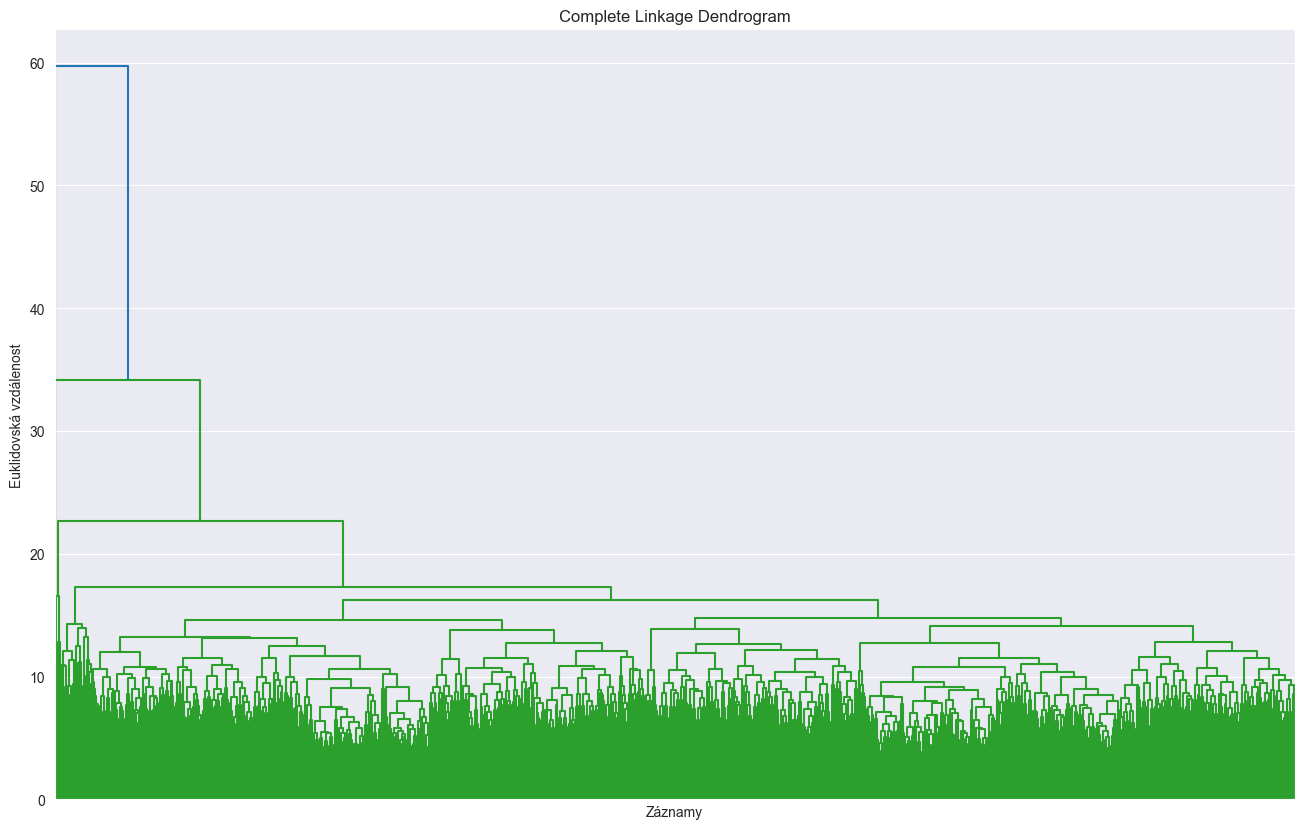

In [103]:
plt.figure(figsize=(16, 10))
dendrogram(complete_linkage, no_labels=True)
plt.title("Complete Linkage Dendrogram")
plt.xlabel("Záznamy")
plt.ylabel("Euklidovská vzdálenost")
plt.show()

Z tohoto dendorgramu bychom mohli určit počet shluků, ale je to poněkud obtížné. Proto se podíváme na další metriky.

#### Single Linkage

In [104]:
single_linkage = linkage(df_link, method='single')

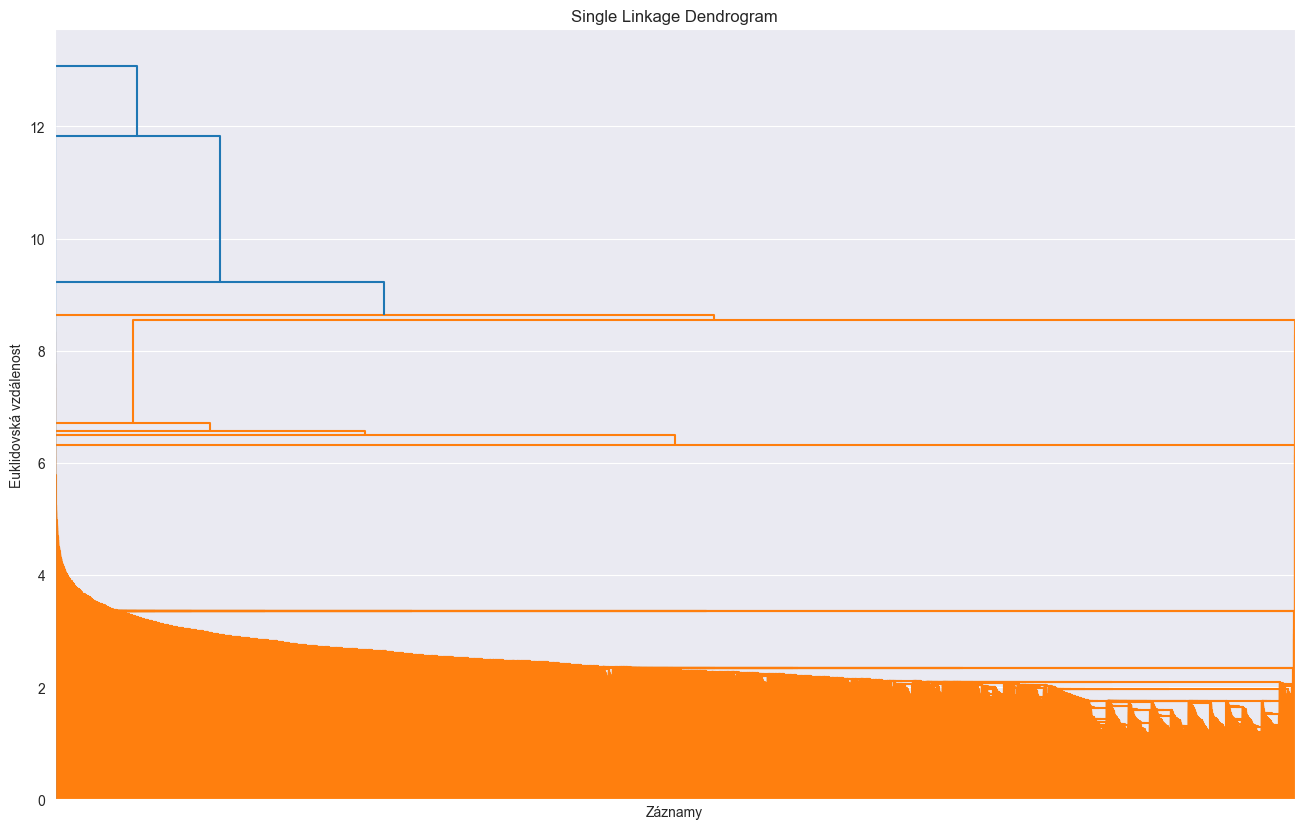

In [105]:
plt.figure(figsize=(16, 10))
dendrogram(single_linkage, no_labels=True)
plt.title("Single Linkage Dendrogram")
plt.xlabel("Záznamy")
plt.ylabel("Euklidovská vzdálenost")
plt.show()

Stejný problém jako u `Complete Linkage`. Proto jedeme dál.

#### Average Linkage

In [106]:
average_linkage = linkage(df_link, method='average')

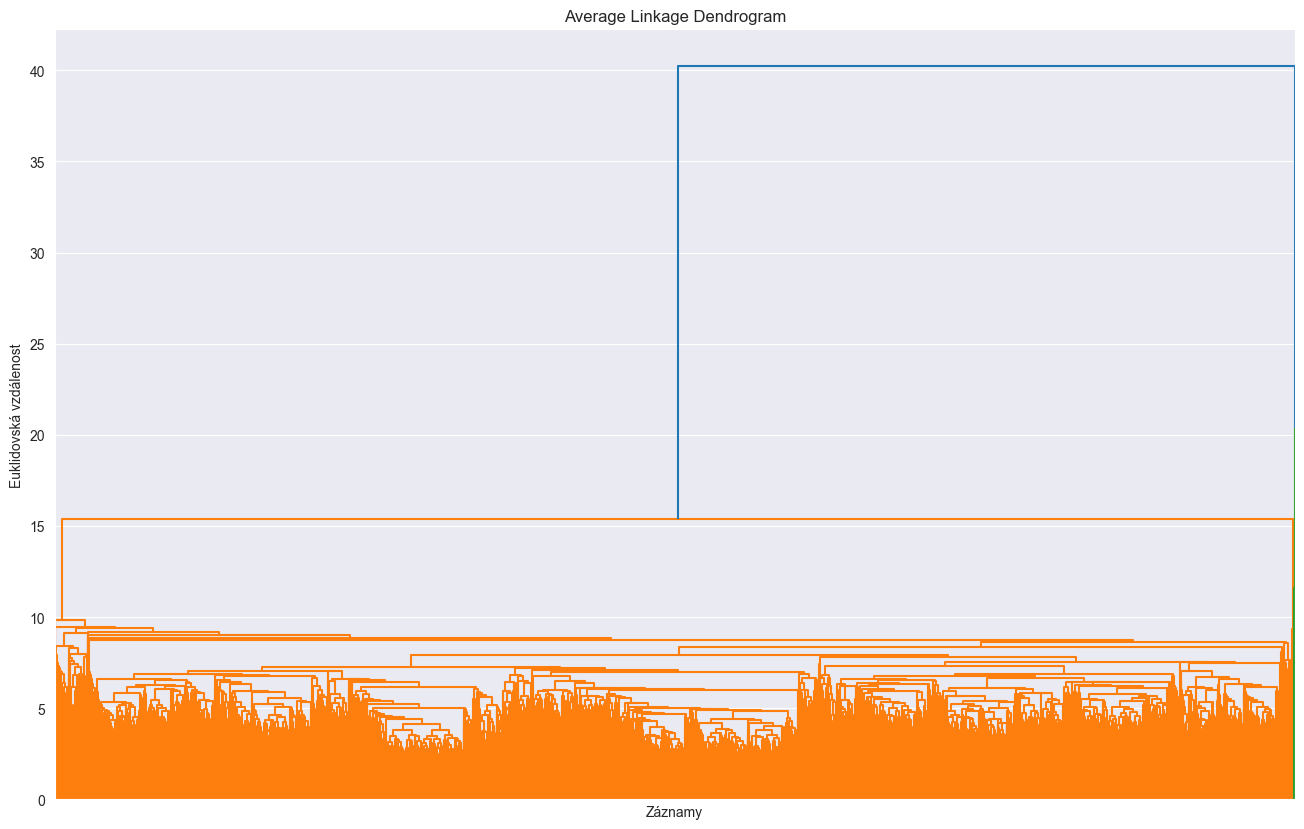

In [107]:
plt.figure(figsize=(16, 10))
dendrogram(average_linkage, no_labels=True)
plt.title("Average Linkage Dendrogram")
plt.xlabel("Záznamy")
plt.ylabel("Euklidovská vzdálenost")
plt.show()

To samé, posuneme se dál.

#### Ward Linkage

In [108]:
ward_linkage = linkage(df_link, method='ward')

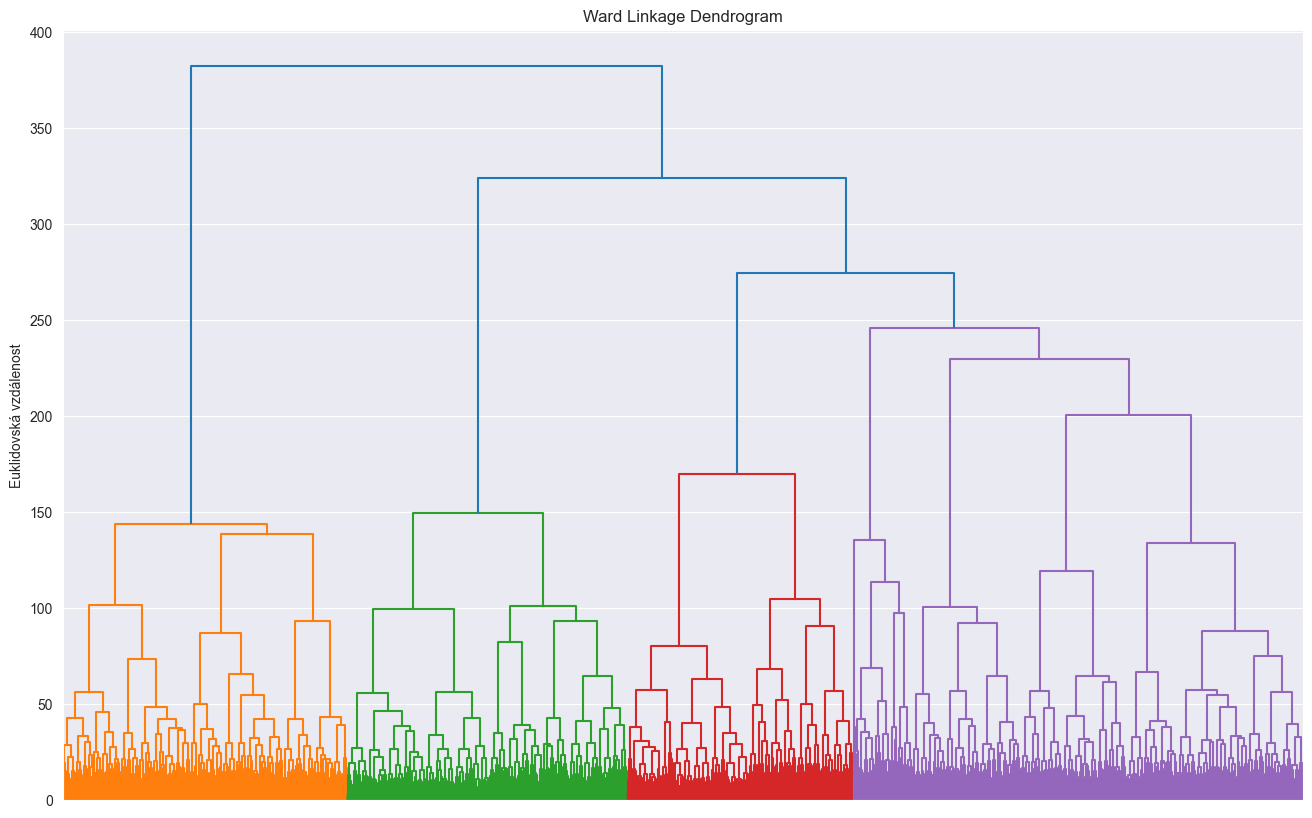

In [109]:
plt.figure(figsize=(16, 10))
dendrogram(ward_linkage, no_labels=True)
plt.title("Ward Linkage Dendrogram")
plt.ylabel("Euklidovská vzdálenost")
plt.show()

Paráda, nyní jde zřetelně vidět, že dendrogram pomocí **Ward Linkage** je nejlepší pro určení optimálního počtu shluků. 

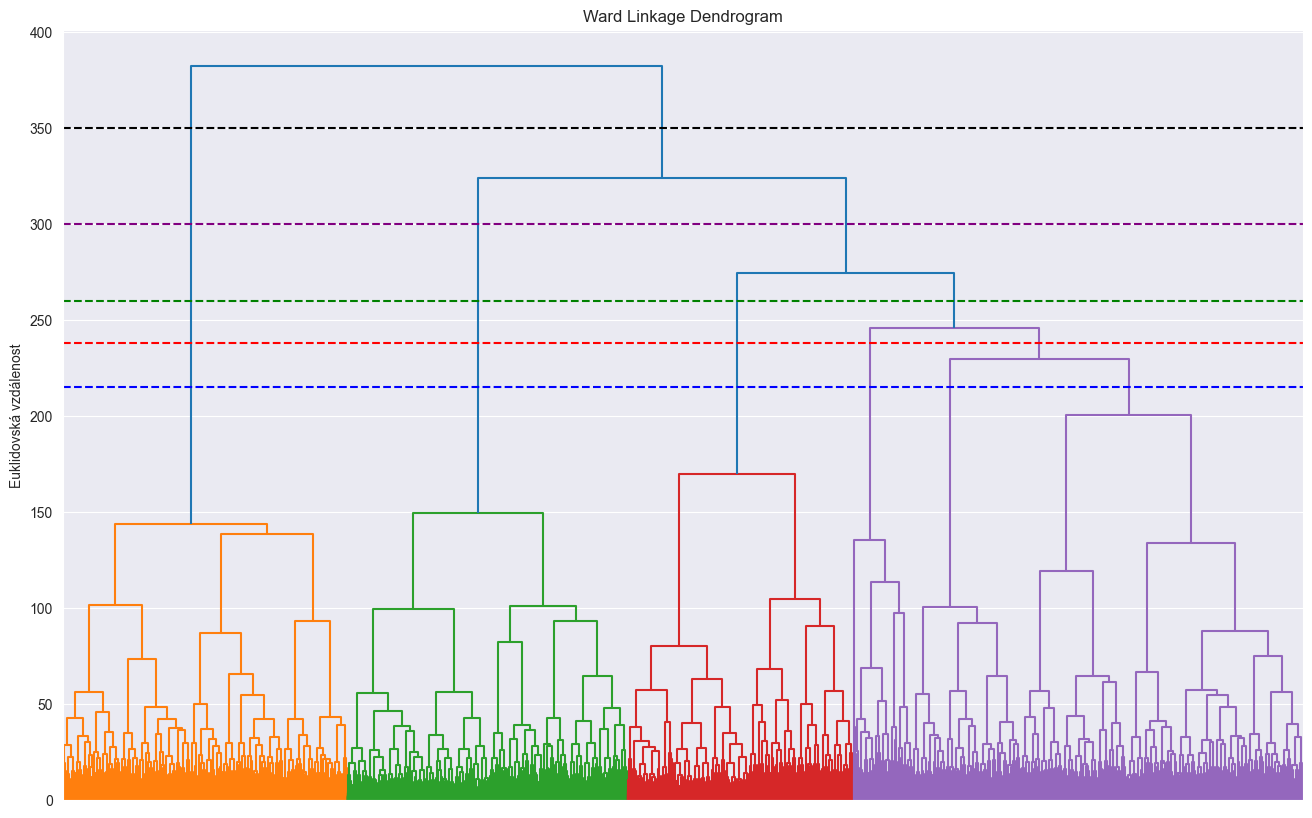

In [132]:
plt.figure(figsize=(16, 10))
dendrogram(ward_linkage, no_labels=True)
plt.title("Ward Linkage Dendrogram")
plt.ylabel("Euklidovská vzdálenost")
plt.axhline(y=350, color='black', linestyle='--')
plt.axhline(y=300, color='purple', linestyle='--')
plt.axhline(y=260, color='green', linestyle='--')
plt.axhline(y=238, color='red', linestyle='--')
plt.axhline(y=215, color='blue', linestyle='--')
plt.show()

Zde jde vidět, že dendrogram se rozdělil na 2 až 6 shluků. Provedeme ještě jeden test, který nám pomůže určit optimální počet shluků a vidět jejich distribuci.

In [133]:
chosen_method = 'ward'

### Určení definitivního počtu shluků

In [134]:
df_link_dummy = df_link.copy()
for n_clusters in range(2, 6):
    clustering = AgglomerativeClustering(linkage='ward', n_clusters=n_clusters)
    clustering = clustering.fit(df_link_dummy)

    df_link_dummy[f'cluster_id_{n_clusters}'] = clustering.labels_

    counts = df_link_dummy[f'cluster_id_{n_clusters}'].value_counts()
    percentages = df_link_dummy[f'cluster_id_{n_clusters}'].value_counts(normalize=True) * 100

    print(f"{n_clusters} shluků:")
    print("-------------------------------------------------------")
    for cluster_id in counts.index:
        print(f"Shluk {cluster_id}: {counts[cluster_id]} záznamů "
              f"({percentages[cluster_id]:.2f}%)")
    print("\n")

2 shluků:
-------------------------------------------------------
Shluk 0: 19945 záznamů (77.02%)
Shluk 1: 5952 záznamů (22.98%)


3 shluků:
-------------------------------------------------------
Shluk 0: 10585 záznamů (40.87%)
Shluk 2: 9360 záznamů (36.14%)
Shluk 1: 5952 záznamů (22.98%)


4 shluků:
-------------------------------------------------------
Shluk 0: 9360 záznamů (36.14%)
Shluk 3: 5952 záznamů (22.98%)
Shluk 1: 5860 záznamů (22.63%)
Shluk 2: 4725 záznamů (18.25%)


5 shluků:
-------------------------------------------------------
Shluk 0: 8133 záznamů (31.41%)
Shluk 3: 5952 záznamů (22.98%)
Shluk 1: 5860 záznamů (22.63%)
Shluk 2: 4725 záznamů (18.25%)
Shluk 4: 1227 záznamů (4.74%)




2 shluky jsou poměrně nevyvážené, 3 shluky už jsou lepší, 4 shluky jsou také vcelku vyvážené a zajímavější, ale od 5 shluků už to není ono. Proto zvolíme 4 shluky jako optimální počet shluků pro aglomerativní hierarchické shlukování. 

In [112]:
chosen_n_clusters = 4

### Provedení shlukování

In [113]:
clustering = AgglomerativeClustering(linkage=chosen_method, n_clusters=chosen_n_clusters)
clustering = clustering.fit(df_link)

In [114]:
df_link["Cluster"] = clustering.labels_

In [115]:
df_link.value_counts("Cluster")

Cluster
0    9360
3    5952
2    5860
1    4725
Name: count, dtype: int64

### Visualizing jednotlivých atributů podle shluků

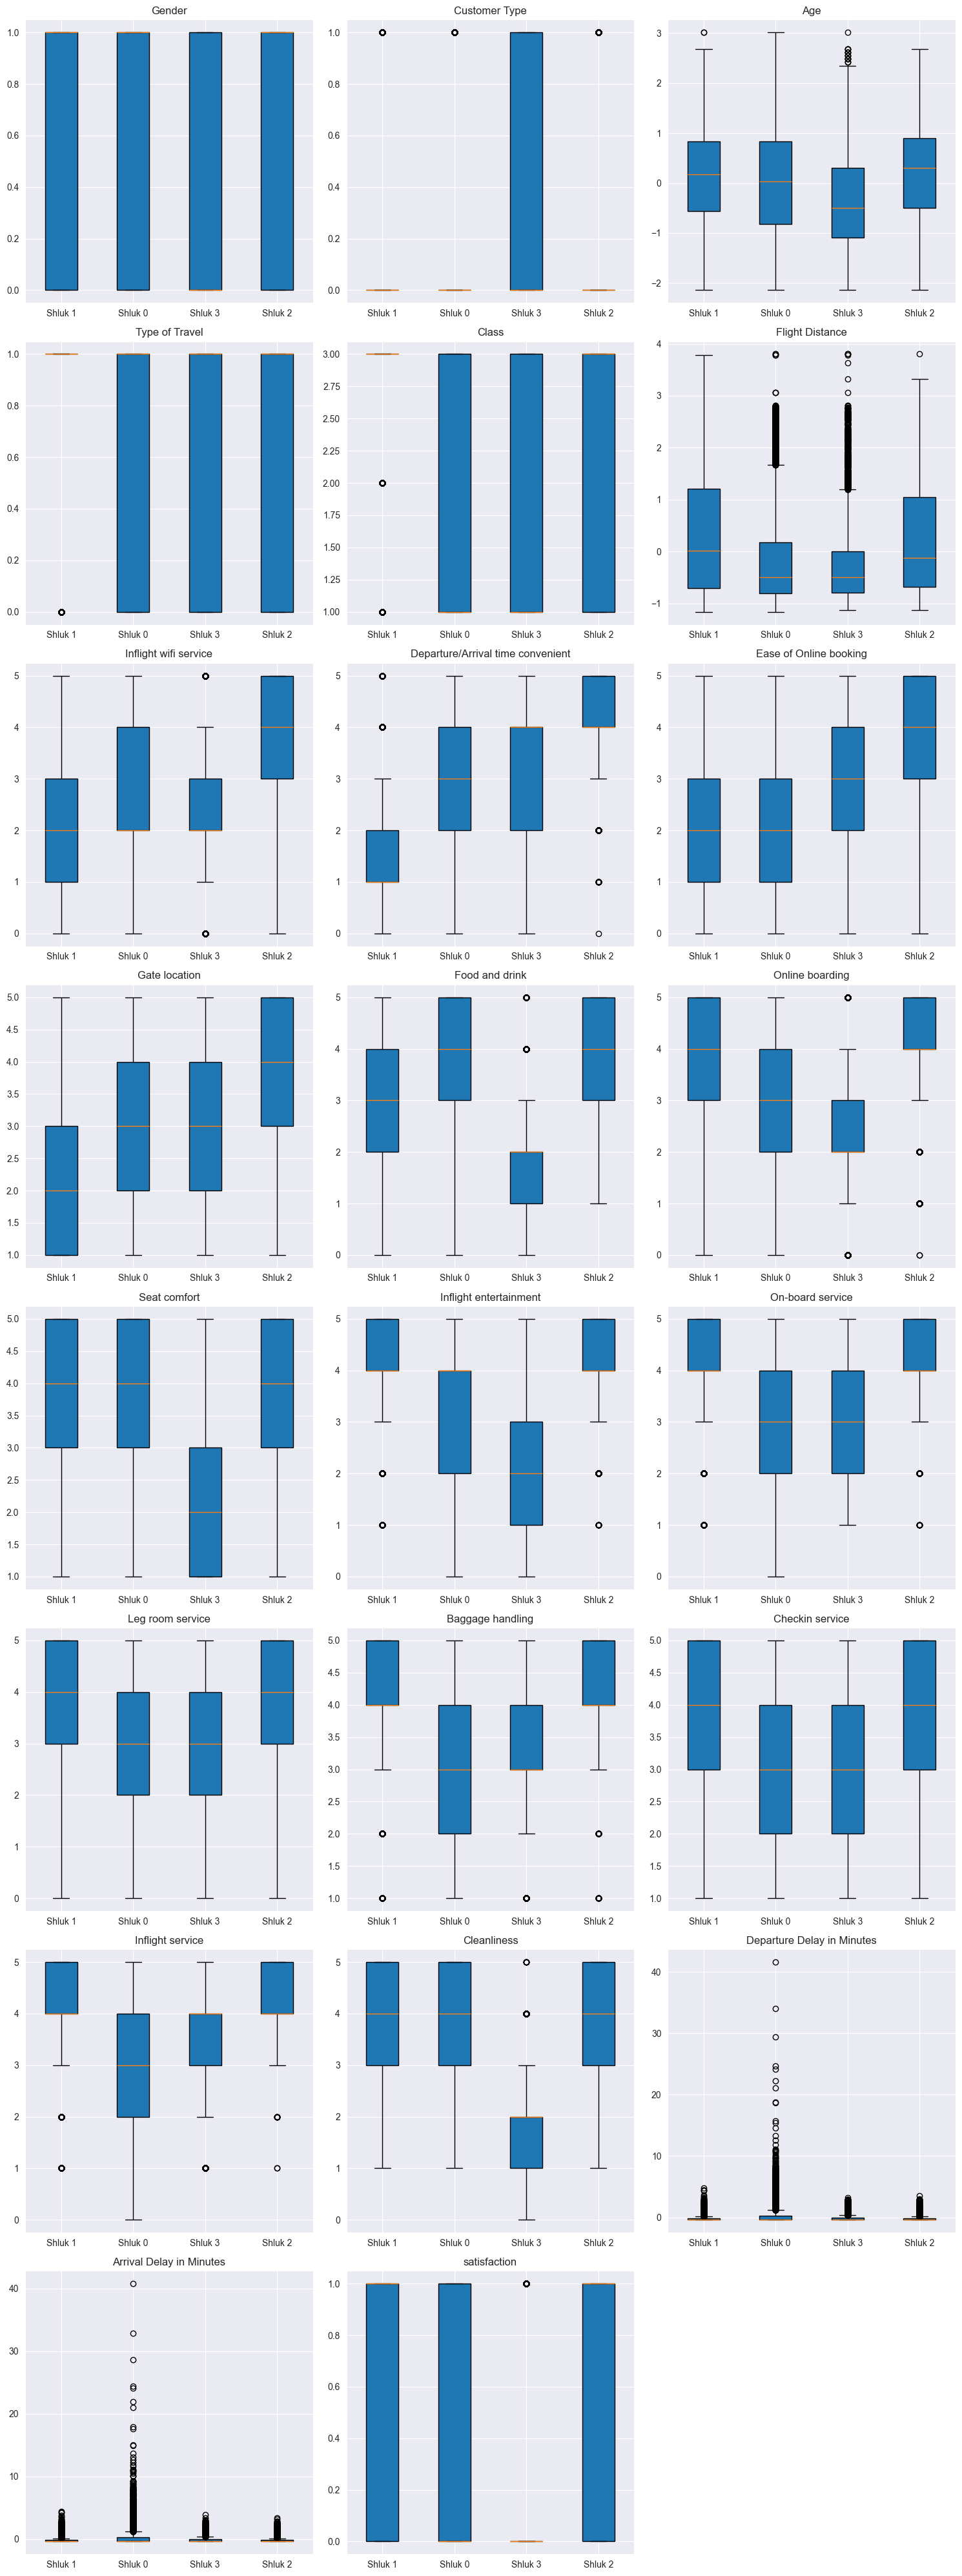

In [135]:
feature_columns_link = df_link.columns[:-1]  # Exclude the last column (Cluster ID)

num_features = len(feature_columns_link)
num_rows = np.ceil(num_features / 3).astype(int)

_, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(feature_columns_link):
    axes[i].boxplot([df_link[df_link["Cluster"] == cluster][column] for cluster in df_link["Cluster"].unique()],
                    patch_artist=True)
    axes[i].set_title(f"{column}")
    axes[i].set_xticklabels([f"Shluk {cluster}" for cluster in df_link["Cluster"].unique()])

for j in range(i + 1, len(axes)):  # Hide the remaining empty subplots
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [117]:
for cluster in df_link["Cluster"].unique():
    print(f"Shluk {cluster}:")
    print(df_link[df_link["Cluster"] == cluster].describe().T)
    print("\n")

Shluk 1:
                                    count      mean       std       min  \
Gender                             4725.0  0.539894  0.498459  0.000000   
Customer Type                      4725.0  0.179683  0.383963  0.000000   
Age                                4725.0  0.134132  0.892265 -2.145109   
Type of Travel                     4725.0  0.890582  0.312196  0.000000   
Class                              4725.0  2.618201  0.768400  1.000000   
Flight Distance                    4725.0  0.321569  1.133447 -1.162049   
Inflight wifi service              4725.0  2.140741  1.245093  0.000000   
Departure/Arrival time convenient  4725.0  1.579048  1.070911  0.000000   
Ease of Online booking             4725.0  2.144127  1.261597  0.000000   
Gate location                      4725.0  2.057778  1.096066  1.000000   
Food and drink                     4725.0  3.366561  1.227776  0.000000   
Online boarding                    4725.0  3.766772  1.145157  0.000000   
Seat comfort    

### Závěr 🚀

Při výběru atributů jsem se řídili korelací a významností atributů.

#### Shluk 0: Průměrní cestující, vyvážené potřeby 🔄
 - **Pohlaví**: Rovnoměrné zastoupení (51 % muži) 🧑‍🤝‍🧑
 - **Typ zákazníka**: Menší podíl věrných cestujících 🎟️
 - **Věk**: Starší než průměr (0.05 standardní jednotky) 🕒 
 - **Typ cesty**: Kombinace pracovních a osobních cest ✈️ 
 - **Třída**: Směs mezi Economy a Business třídou 👩‍💼
 - **Wifi na palubě**: Uspokojivé (2.55 z 5) 📡
 - **Jídlo a pití**: Nadprůměrné (3.75 z 5) 🍽️
 - **Komfort  sedadla**: Dobré (3.82 z 5) 🛋️
 - **Zábava na palubě**: Dobré (3.39 z 5) 📺
 - **Manipulace se zavazadly**: Průměrné (3.00 z 5) 🎒 
 - **Spokojenost**: Podprůměrná (31 %) 😐 

 #### Shluk 1: Spokojení zákazníci, zaměřeni na komfort ✨

 - **Pohlaví**: Převaha žen (54 %) 🧑‍🤝‍🧑
 - **Typ zákazníka**: Většinou vracející se zákazníci 🎟️ 
 - **Věk**: Mladší cestující (průměrný věk 0.13 standardní jednotky) 🕒
 - **Typ cesty**: Převážně osobní cesty (89 %) ✈️
 - **Třída**: Business třída (většina) 👩‍💼
 - **Wifi na palubě**: Uspokojivé hodnocení (2.14 z 5) 📡
 - **Jídlo** a pití: Dobré (3.37 z 5) 🍽️ 
 - **Komfort sedadla**: Vysoké hodnocení (3.84 z 5) 🛋️
 - **Zábava na palubě**: Velmi dobré (4.09 z 5) 📺
 - **Manipulace se zavazadly**: Výborné (4.22 z 5) 🎒
 - **Spokojenost**: Velmi vysoká (73 %) 😃

####  Shluk 2: Prémioví cestující, oceňující kvalitu služeb 🌟

- **Pohlaví**: Mírná převaha žen (52 %) 🧑‍🤝‍🧑
- **Typ zákazníka**: Většina loajálních zákazníků 🎟️ 
- **Věk**: Starší (0.18 standardní jednotky) 🕒
- **Typ cesty**: Převážně osobní cesty (73 %) ✈️
- **Třída**: Převážně Business třída 👩‍💼
- **Wifi na palubě**: Velmi vysoké hodnocení (3.77 z 5) 📡️ 
- **Jídlo a pití**: Nadprůměrné (3.55 z 5) 🍽 
- **Komfort sedadla**: Vysoké hodnocení (3.95 z 5) 🛋
- **Zábava na palubě**: Skvělé (4.17 z 5) 📺
- **Manipulace se zavazadly**: Vynikající (4.39 z 5) 🎒
- **Spokojenost**: Vysoká (71 %) 😊

####  Shluk 3: Nespokojení cestující s důrazem na praktičnost ❌

- **Pohlaví**: Více mužů (45 %)  🧑‍🤝‍🧑
- **Typ zákazníka**: Vyšší podíl příležitostných cestujících 🎟️
- **Věk**: Mladší (−0.34 standardní jednotky) 🕒 
- **Typ cesty**: Směs osobních a pracovních cest ✈️
- **Třída**: Převážně Economy třída  👩‍💼
- **Wifi na palubě**: Průměrné hodnocení (2.41 z 5) 📡
- **Jídlo a pití**: Nízké hodnocení (1.91 z 5) 🍽
- **Komfort sedadla**: Podprůměrný (2.05 z 5) 🛋
- **Zábava na palubě**: Nízké hodnocení (1.95 z 5) 📺
- **Manipulace se zavazadly**: Průměrné (3.40 z 5) 🎒
- **Spokojenost**: Velmi nízká (13 %) 😔
 

## DBSCAN

Jelikož DBSCAN dokáže dobře vyfiltrovat šum v datech, můžeme použít původní data bez redukce.

In [136]:
df_dbscan = df_scaled.copy()

### DBSCAN parametry

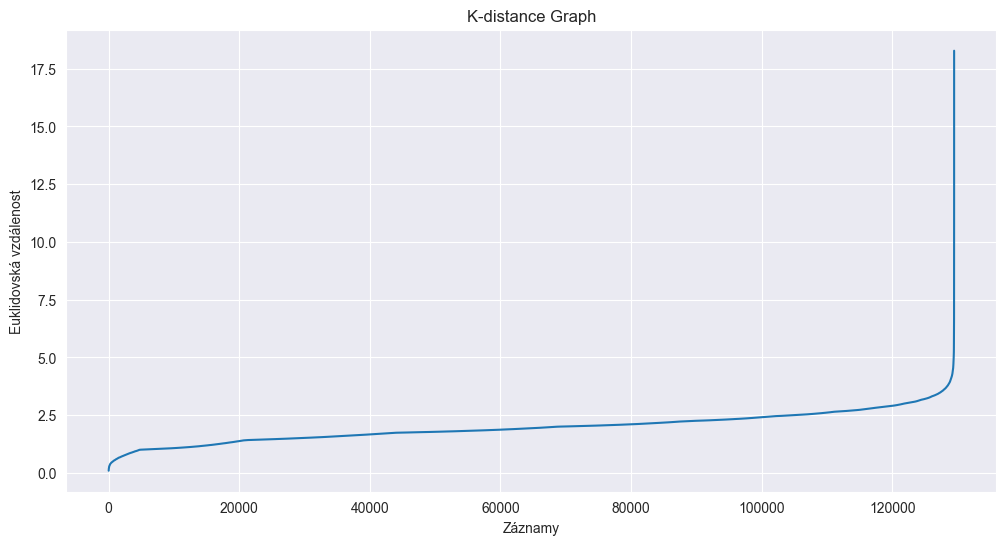

In [137]:
# https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan
nearest_neighbors = NearestNeighbors(n_neighbors=3)
neighbors = nearest_neighbors.fit(df_dbscan)
distances, indices = neighbors.kneighbors(df_dbscan)

distances = np.sort(distances[:, 3 - 1], axis=0)
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Záznamy")
plt.ylabel("Euklidovská vzdálenost")
plt.show()

Z grafu jde vidět, že vzálenost mezi jednotlivými začne stoupat při vzdálenosti okolo 2,5. Proto zkusíme hledat optimální parametry pro DBSCAN v rozmezí 2,5 až 4 pro `eps` a 10 až 50 pro `min_samples`.

### Určení optimálních parametrů

In [261]:
range_distances = np.arange(2.5, 3.5, 0.1)
range_sample = np.arange(10, 41, 10)

In [262]:
dbscan_results = []
for distance in range_distances:
    for sample in range_sample:
        dbscan = DBSCAN(eps=distance, min_samples=sample)
        dbscan.fit(df_dbscan)

        num_of_clusters = len(np.unique(dbscan.labels_))
        num_of_noise = np.sum(np.array(dbscan.labels_) == -1)
        dbscan_results.append({
            "distance": distance,
            "sample": sample,
            "num_of_clusters": num_of_clusters,
            "num_of_noise": num_of_noise
        })

        print(f"Distance: {distance:.2f}, Sample: {sample}, "
              f"Počet shluků: {num_of_clusters}, Počet šumu: {num_of_noise}")
    print("\n")

Distance: 2.50, Sample: 10, Počet shluků: 28, Počet šumu: 27783
Distance: 2.50, Sample: 20, Počet shluků: 15, Počet šumu: 37693
Distance: 2.50, Sample: 30, Počet shluků: 17, Počet šumu: 45881
Distance: 2.50, Sample: 40, Počet shluků: 15, Počet šumu: 53170


Distance: 2.60, Sample: 10, Počet shluků: 20, Počet šumu: 22220
Distance: 2.60, Sample: 20, Počet shluků: 10, Počet šumu: 29841
Distance: 2.60, Sample: 30, Počet shluků: 11, Počet šumu: 36402
Distance: 2.60, Sample: 40, Počet shluků: 13, Počet šumu: 42191


Distance: 2.70, Sample: 10, Počet shluků: 8, Počet šumu: 17163
Distance: 2.70, Sample: 20, Počet shluků: 8, Počet šumu: 22655
Distance: 2.70, Sample: 30, Počet shluků: 7, Počet šumu: 27504
Distance: 2.70, Sample: 40, Počet shluků: 6, Počet šumu: 31965


Distance: 2.80, Sample: 10, Počet shluků: 6, Počet šumu: 13656
Distance: 2.80, Sample: 20, Počet shluků: 6, Počet šumu: 17796
Distance: 2.80, Sample: 30, Počet shluků: 5, Počet šumu: 21431
Distance: 2.80, Sample: 40, Počet shluků:

Díváme se na hodnoty, které mají zhruba 3 až 5 shluků a minimální počet záznamů ve šumu. Pokud zvolíme vysokou vzdálenost a nízký počet vzorků, můžme získat méně shluků a méně šumu, ale dostaneme mnohem více nevyvážené rozdělení shluků. Naopak pokud zvolíme nízkou vzdálenost a vysoký počet vzorků, dostaneme více shluků a méně šumu, ale můžeme dostat příliš mnoho shluků. Proto zvolíme hodnoty `eps=3.0` a `min_samples=30` a budeme počítat s tím, že dostaneme velké množství šumu.

In [270]:
chosen_eps = 3.0
chosen_min_samples = 30

### Provedení shlukování

In [271]:
dbscan = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
dbscan.fit(df_dbscan)

DBSCAN(eps=3.0, min_samples=30)

In [272]:
df_dbscan["Cluster"] = dbscan.labels_

In [273]:
df_dbscan.value_counts("Cluster")

Cluster
 0    105487
-1     12451
 1      8117
 3      1734
 2      1698
Name: count, dtype: int64

In [276]:
for cluster in df_dbscan["Cluster"].unique():
    print(f"Shluk {cluster}:")
    print(df_dbscan[df_dbscan["Cluster"] == cluster].describe().T)
    print("\n")

Shluk 0:
                                      count      mean       std       min  \
Gender                             105487.0  0.506584  0.499959  0.000000   
Customer Type                      105487.0  0.198100  0.398570  0.000000   
Age                                105487.0 -0.054648  1.008298 -2.145109   
Type of Travel                     105487.0  0.670831  0.469914  0.000000   
Class                              105487.0  1.950202  0.959326  1.000000   
Flight Distance                    105487.0 -0.060031  0.963485 -1.162049   
Inflight wifi service              105487.0  2.784542  1.295455  0.000000   
Departure/Arrival time convenient  105487.0  3.145753  1.500457  0.000000   
Ease of Online booking             105487.0  2.826585  1.364898  0.000000   
Gate location                      105487.0  3.046413  1.253986  0.000000   
Food and drink                     105487.0  3.198451  1.333138  0.000000   
Online boarding                    105487.0  3.171841  1.312529  0.

### Vizualizace jednotlivých atributů podle shluků

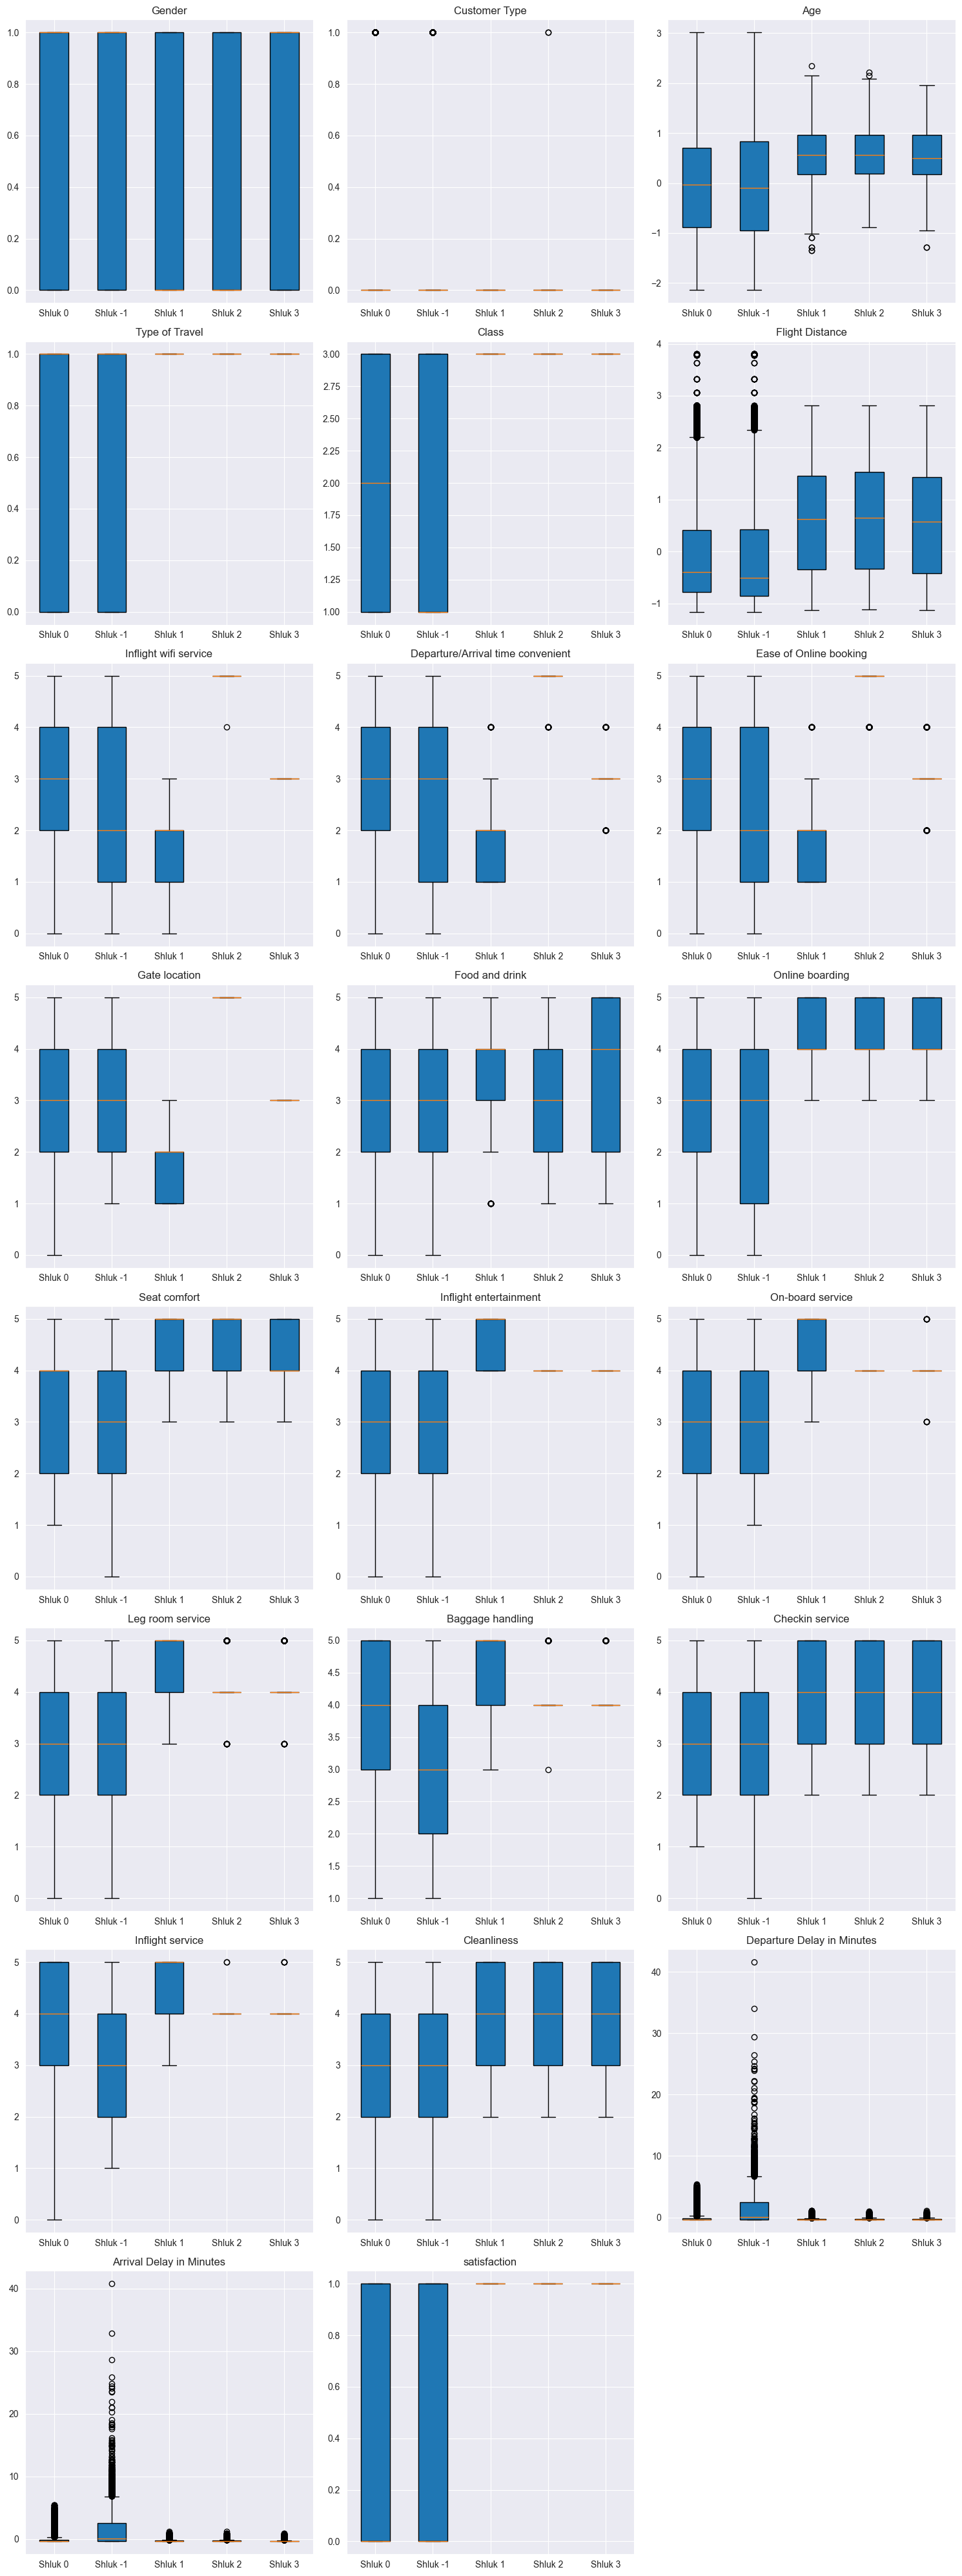

In [275]:
feature_columns_dbscan = df_dbscan.columns[:-1]  # Exclude the last column (Cluster ID)

num_features = len(feature_columns_dbscan)
num_rows = np.ceil(num_features / 3).astype(int)

_, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(feature_columns_dbscan):
    axes[i].boxplot([df_dbscan[df_dbscan["Cluster"] == cluster][column] for cluster in df_dbscan["Cluster"].unique()],
                    patch_artist=True)
    axes[i].set_title(f"{column}")
    axes[i].set_xticklabels([f"Shluk {cluster}" for cluster in df_dbscan["Cluster"].unique()])

for j in range(i + 1, len(axes)):  # Hide the remaining empty subplots
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Závěr 🚀

#### Shluk 0: Průměrná spokojenost cestujících 😊

- **Charakteristika**: Tento shluk zahrnuje cestující s průměrnou úrovní *spokojenosti* (hodnota 0,37) a vyrovnanými hodnoceními napříč parametry.
- **Demografie a typ cestování**: Věkový průměr cestujících se pohybuje kolem neutrálních hodnot. Cestující zahrnují jak rekreační, tak obchodní klientelu.
- **Hodnocení služeb**: Wi-Fi, *pohodlí sedadel* a *čistota* jsou hodnoceny průměrně. *Jídlo a pití* jsou mírně lepší než ostatní služby.
- **Zpoždění**: *Zpoždění při odletech* a *příletech* je velmi nízké, což naznačuje efektivní řízení časového plánu.
- **Shrnutí**: Typická skupina cestujících, která očekává základní standard a spíše neutrálně hodnotí kvalitu služeb.

#### Shluk 1: Vysoce spokojená skupina 🌟

- **Charakteristika**: Cestující s 100% spokojeností. Hodnocení všech parametrů, jako jsou *služby, zábava a pohodlí*, jsou blízká maximálním hodnotám.
- **Demografie a typ cestování**: Mladší cestující, kteří preferují business třídu. Všichni cestující jsou obchodní klientela.
- **Hodnocení služeb: Sedadla a zábava na palubě mají průměrné hodnocení blížící se nejvyšším možným hodnotám (4,5 a více). Online odbavení a rychlost služeb na letišti jsou také velmi oceňovány.
- **Zpoždění**: *Minimální zpoždění odletů* a *příletů*, což přispívá k celkové vysoké spokojenosti.
- **Shrnutí**: Prémiová skupina, která oceňuje efektivitu, kvalitu a pohodlí. Tato skupina je ideální cílovou skupinou pro nadstandardní služby.

#### Shluk 2: Tech-savvy cestující 💻

- **Charakteristika**: Cestující, kteří mají velmi vysoké *požadavky na technologie* a *služby*, jako je Wi-Fi a online odbavení.
- **Demografie a typ cestování**: Všichni cestující jsou z *business třídy*, často mladší a s vysokými nároky na technologické aspekty služeb.
- **Hodnocení služeb**: *Wi-Fi, pohodlí* a *efektivita letištních služeb* jsou hodnoceny maximálně. *Zábava* na palubě a čistota získávají vysoká, ale o něco nižší hodnocení než v jiných shlucích.
- **Zpoždění**: *Zpoždění jsou zanedbatelná*, což odpovídá vysokým nárokům této skupiny na časovou přesnost.
- **Shrnutí**: Skupina zaměřená na *moderní služby*, která očekává nejvyšší standard v oblasti *technologií* a *pohodlí*.

#### Shluk 3: Prémiová klientela ✈️

- **Charakteristika**: *Vysoce spokojená skupina* cestujících, která oceňuje zejména *tradiční kvalitu služeb*.
- **Demografie a typ cestování**: Podobně jako Shluk 1, všichni cestující pochází z *business třídy*. Věková struktura je mírně diverzifikovanější.
- **Hodnocení služeb**: Hodnocení pohodlí sedadel, čistoty a zábavy na palubě je velmi vysoké, i když ne tak technologicky orientované jako Shluk 2.
- **Zpoždění**: *Zpoždění jsou minimální* a nemají vliv na spokojenost cestujících.
- **Shrnutí**: *Prémiová skupina*, která upřednostňuje pohodlí a vysokou kvalitu služeb spojenou s tradičními hodnotami.

#### Shluk -1: Vyfiltrovaný shluk - Cestující s nízkými hodnoceními 😟

- **Charakteristika**: Tito cestující vykazují *nízkou úroveň spokojenosti*, s průměrem 0,38, a často hodnotí služby *negativně*.
- **Demografie a typ cestování**: Zahrnuje *širší spektrum věkových skupin*, přičemž *zpoždění* a *nedostatečné služby* jsou pro tuto skupinu hlavními *frustracemi*.
- **Hodnocení služeb**: *Nejnižší hodnocení mají Wi-Fi, jídlo a čistota.* *Čekací doby* na letišti a služby na palubě jsou často označovány jako *problematické*.
- **Zpoždění**: Významně *vyšší zpoždění* oproti jiným shlukům (průměr 1,3 minuty u odletů a příletů).
- **Shrnutí**: *Skupina nespokojených zákazníků*, která může mít negativní zkušenost kvůli *špatné organizaci* a *nízké kvalitě služeb*.